In [572]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import ipywidgets
import ctaplot

In [2]:
from descartes import PolygonPatch
from shapely.ops import unary_union, polygonize
from shapely.geometry import mapping, Polygon, Point, LineString
#from matplotlib.colors import ListedColormap

In [3]:
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize']



[14.0, 10.0]

# Polar FOVS

## load fovs

In [4]:
# FOV 05
div_05 = open("CTA-ULTRA6-LaPalma-divergent_05_180.cfg")
text_05 = div_05.read()
text_05 = text_05.split("#")[1:]

tels_dict_05 = {}
for line in text_05:
    line_list = line.split("\n")
    tels_dict_05[int(line_list[0])] = {
        line_list[1].split("=")[0]: float(line_list[1].split("=")[1]),
        line_list[2].split("=")[0]: float(line_list[2].split("=")[1]),
    }

In [5]:
# fov 2
div_2 = open("CTA-ULTRA6-LaPalma-divergent_2_180.cfg")
text_2 = div_2.read()
text_2 = text_2.split("#")[1:]

tels_dict_2 = {}
for line in text_2:
    line_list = line.split("\n")
    tels_dict_2[int(line_list[0])] = {
        line_list[1].split("=")[0]: float(line_list[1].split("=")[1]),
        line_list[2].split("=")[0]: float(line_list[2].split("=")[1]),
    }

In [6]:
# fov 3
div_3 = open("CTA-ULTRA6-LaPalma-divergent_3_180.cfg")
text_3 = div_3.read()
text_3 = text_3.split("#")[1:]

tels_dict_3 = {}
for line in text_3:
    line_list = line.split("\n")
    tels_dict_3[int(line_list[0])] = {
        line_list[1].split("=")[0]: float(line_list[1].split("=")[1]),
        line_list[2].split("=")[0]: float(line_list[2].split("=")[1]),
    }

In [7]:
# FOV 4
div_4 = open("CTA-ULTRA6-LaPalma-divergent_4_180.cfg")
text_4 = div_4.read()
text_4 = text_4.split("#")[1:]

tels_dict_4 = {}
for line in text_4:
    line_list = line.split("\n")
    tels_dict_4[int(line_list[0])] = {
        line_list[1].split("=")[0]: float(line_list[1].split("=")[1]),
        line_list[2].split("=")[0]: float(line_list[2].split("=")[1]),
    }

## plot fovs

In [633]:
## import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost,    ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import GridHelperCurveLinear
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D


def polar_stuff(fig, data, mean_poiting=None):
    # PolarAxes.PolarTransform takes radian. However, we want our coordinate
    # system in degree
    tr = Affine2D().scale(np.pi/180., 1.).translate(+np.pi/2.,0) + PolarAxes.PolarTransform()

    # polar projection, which involves cycle, and also has limits in
    # its coordinates, needs a special method to find the extremes
    # (min, max of the coordinate within the view).

    # 20, 20 : number of sampling points along x, y direction
    n = len(data)
    extreme_finder = angle_helper.ExtremeFinderCycle(n, n,
                                                     lon_cycle=360,
                                                     lat_cycle=None,
                                                     lon_minmax=None,
                                                     lat_minmax=(-90, 90),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)
    # Find a grid values appropriate for the coordinate (degree,
    # minute, second).

    tick_formatter1 = angle_helper.FormatterDMS()
    # And also uses an appropriate formatter.  Note that,the
    # acceptable Locator and Formatter class is a bit different than
    # that of mpl's, and you cannot directly use mpl's Locator and
    # Formatter here (but may be possible in the future).

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

    # make ticklabels of right and top axis visible.
    ax1.axis["right"].major_ticklabels.set_visible(True)
    ax1.axis["top"].major_ticklabels.set_visible(True)

    # let right axis shows ticklabels for 1st coordinate (angle)
    ax1.axis["right"].get_helper().nth_coord_ticks = 0
    # let bottom axis shows ticklabels for 2nd coordinate (radius)
    ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

    fig.add_subplot(ax1)

    # A parasite axes with given transform
    ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
    # note that ax2.transData == tr + ax1.transData
    # Anything you draw in ax2 will match the ticks and grids of ax1.
    ax1.parasites.append(ax2)
    # intp = cbook.simple_linear_interpolation
    #ax2.plot(intp(np.array([0, 30]), 50),
    #         intp(np.array([10., 10.]), 50),
    #         linewidth=2.0)

    for key, value in data.items():
#         if key < 5:
#             continue
        theta = value['THETA']
        phi = value['PHI']
        # point.set_transform(ax2.transData)
        # transform center coordinates: 
        # circle1 = plt.Circle(
        #     (
        #         (phi-180)*(theta/np.cos((phi-180)*np.pi/180))/90*np.pi/2,
        #         #(phi-180)*(theta)/(90),
        #         -theta*np.cos((phi-180)*np.pi/180)
        #     ), 
        #     7.7/2, color='r', alpha=0.1
        # )
        circle1 = plt.Circle(
            (
                (phi-180)*np.sin(np.deg2rad(theta)), 
                -theta*np.cos(np.deg2rad((phi-180)))
            ), 
            radius=7.7/2, 
            color="red", alpha=0.2
        )


        ax1.add_artist(circle1)
        point = ax1.scatter(phi, theta, c = "b", s = 20, zorder= 10, transform=ax2.transData)
        # ax2.scatter(phi, theta, c = "b", s = 50)
        ax2.annotate((key), (phi, theta), fontsize=15, xytext=(4, 4), textcoords='offset pixels')

    if mean_poiting:
        ax1.scatter(mean_poiting[0], mean_poiting[1], label="mean", zorder=20, c="green")
        ax2.annotate("m", (mean_poiting[0], mean_poiting[1]),  
                     fontsize=30, xytext=(-15, 4), 
                     textcoords='offset pixels', 
                     zorder=30, color="green")

    theta = np.array([data[i]['THETA'] for i in data])
    phi = np.array([data[i]['PHI'] for i in data])
    print(theta.min(), theta.max())
    print(phi.min(), phi.max())
#     ax1.set_xlim(phi.min()*2,phi.max()*2)
    ax1.set_ylim(-theta.min()/1.4, -theta.max()*1.4)
    ax1.set_xlim(-20,20)
    ax1.set_ylim(-10, 10)
    ax1.set_aspect(1.)
    ax1.grid(True, zorder=0)
    ax1.set_xlabel("Azimuth in degrees", fontsize=20)
    ax1.set_ylabel("Zenith in degrees", fontsize=20)
    return fig, point

In [571]:
test_dict[]

{0: {'THETA': 1.6584194253914148, 'PHI': 1.4839569015487445e-29},
 1: {'THETA': 1.6584194253914148, 'PHI': 90.00000000000013},
 2: {'THETA': 1.6584194253914148, 'PHI': 180.0},
 3: {'THETA': 1.6584194253914148, 'PHI': 269.9999999999999},
 4: {'THETA': 3.31406463024922, 'PHI': 7.419784507743715e-30},
 5: {'THETA': 3.31406463024922, 'PHI': 90.00000000000006},
 6: {'THETA': 3.31406463024922, 'PHI': 180.0},
 7: {'THETA': 3.31406463024922, 'PHI': 269.99999999999994},
 8: {'THETA': 4.681582347240919, 'PHI': 45.00000000000003},
 9: {'THETA': 4.681582347240919, 'PHI': 224.99999999999997},
 10: {'THETA': 4.681582347240919, 'PHI': 314.99999999999994},
 11: {'THETA': 4.681582347240919, 'PHI': 135.00000000000003}}

In [161]:
tel_fake = {}
tel_fake[14] = {'PHI':190, 'THETA':30}
tel_fake[19] = {'PHI':150, 'THETA':12}


In [142]:
tels_dict_4

{1: {'THETA': 20.12, 'PHI': 179.1},
 2: {'THETA': 20.29, 'PHI': 178.36},
 3: {'THETA': 19.86, 'PHI': 180.21},
 4: {'THETA': 19.5, 'PHI': 181.82},
 5: {'THETA': 22.62, 'PHI': 180.66},
 6: {'THETA': 21.9, 'PHI': 184.6},
 7: {'THETA': 17.16, 'PHI': 185.07},
 8: {'THETA': 13.77, 'PHI': 182.43},
 9: {'THETA': 14.96, 'PHI': 176.43},
 10: {'THETA': 19.51, 'PHI': 176.21},
 11: {'THETA': 22.71, 'PHI': 176.7},
 12: {'THETA': 20.05, 'PHI': 188.11},
 13: {'THETA': 17.32, 'PHI': 172.47},
 14: {'THETA': 22.29, 'PHI': 172.87},
 15: {'THETA': 17.78, 'PHI': 180.53},
 16: {'THETA': 24.73, 'PHI': 188.29},
 17: {'THETA': 25.69, 'PHI': 183.5},
 18: {'THETA': 26.37, 'PHI': 178.74},
 19: {'THETA': 13.13, 'PHI': 173.38}}

In [325]:
paranal = np.loadtxt('/Users/thomasvuillaume/Work/Dev/pschitt/share/arrays/paranal.txt',
                     skiprows=1,
                     delimiter=',',
                     usecols=(2,3,4)
                    )
# paranal

In [467]:
center = [0,0,0]
tels =np.array([[1,0,0],
                [0,1,0],
                [-1,0,0],
                [0,-1,0],
                [2,0,0],
                [0,2,0],
                [-2,0,0],
                [0,-2,0],
                [2,2,0],
                [-2,-2,0],
                [2,-2,0],
                [-2,2,0]
               ])
# tels = np.random.rand(10,3)
# tels = paranal/1000

In [468]:
def array_alt_az_div(div, tels_pos, alt, az):
    B = np.mean(tels_pos, axis=0)
    gb = - np.log(div)
    Gx = B[0] - gb * np.cos(alt)*np.cos(az)
    Gy = B[1] - gb * np.cos(alt)*np.sin(az)
    Gz = B[2] - gb * np.sin(alt)
    G = np.array([Gx, Gy, Gz])
    
#     print(B)
#     print(G)
    tels_dict = {}
    for ii, tel in enumerate(tels_pos):
        gt = np.sqrt(((tel - G)**2).sum())
#         print("gt", gt)
        alt_tel = np.arcsin((tel[2]-Gz)/gt)
        az_tel = np.arctan2((tel[1]-Gy), (tel[0] - Gx))
#         print("alt", np.rad2deg(alt_tel))
#         print("az", az_tel)
        tels_dict[ii] = {'THETA': 90-np.rad2deg(alt_tel),
                         'PHI': np.rad2deg(np.mod(az_tel, 2*np.pi)),
                        }
    return tels_dict
    

(-2.204224270353303, 2.204224270353303, -2.2060706401766006, 2.2060706401766)

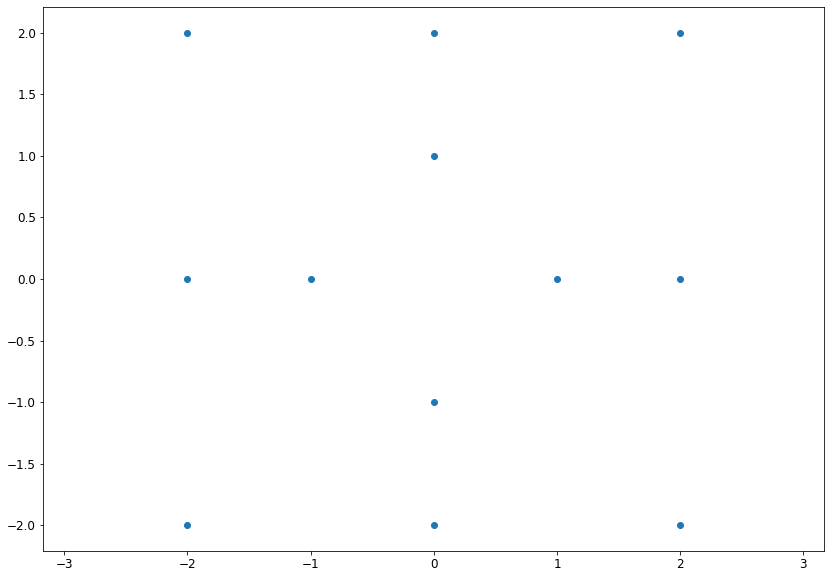

In [469]:
plt.scatter(tels[:,0], tels[:,1])
plt.axis('equal')

In [600]:
test_dict = array_alt_az_div(1e-15, tels, np.deg2rad(90), np.pi)

In [601]:
# tels_dict_4

In [602]:
test_dict

{0: {'THETA': 1.6584194253914148, 'PHI': 1.4839569015487445e-29},
 1: {'THETA': 1.6584194253914148, 'PHI': 90.00000000000013},
 2: {'THETA': 1.6584194253914148, 'PHI': 180.0},
 3: {'THETA': 1.6584194253914148, 'PHI': 269.9999999999999},
 4: {'THETA': 3.31406463024922, 'PHI': 7.419784507743715e-30},
 5: {'THETA': 3.31406463024922, 'PHI': 90.00000000000006},
 6: {'THETA': 3.31406463024922, 'PHI': 180.0},
 7: {'THETA': 3.31406463024922, 'PHI': 269.99999999999994},
 8: {'THETA': 4.681582347240919, 'PHI': 45.00000000000003},
 9: {'THETA': 4.681582347240919, 'PHI': 224.99999999999997},
 10: {'THETA': 4.681582347240919, 'PHI': 314.99999999999994},
 11: {'THETA': 4.681582347240919, 'PHI': 135.00000000000003}}

In [603]:
tel_fake[14]['THETA'] = 23.4
tel_fake[14]['PHI'] = 180

1.6584194253914148 4.681582347240919
7.419784507743715e-30 314.99999999999994


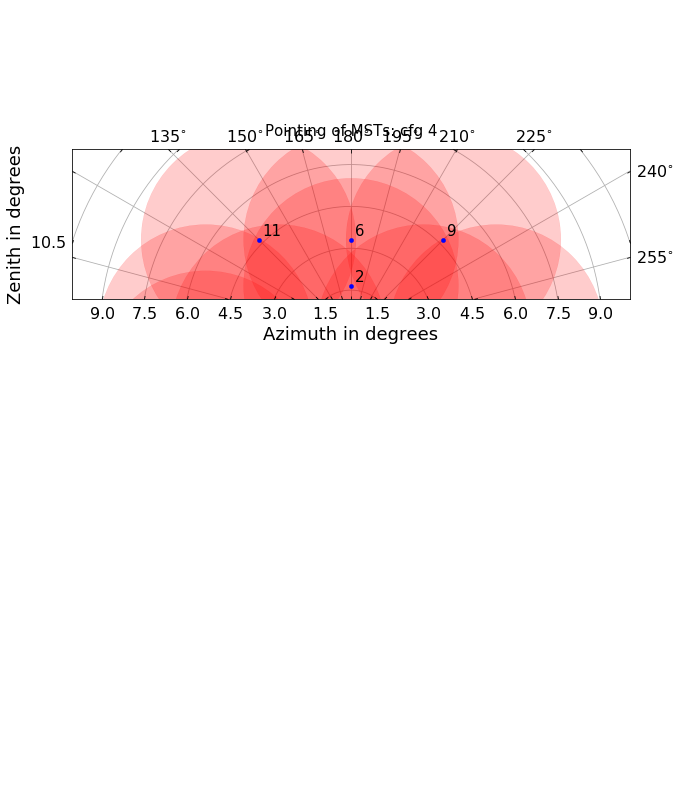

In [604]:
fig = polar_stuff(plt.figure(figsize=(10,8)), test_dict)
#plt.xlabel("test", fontsize=100)
plt.title("Pointing of MSTs: cfg 4", fontsize=15, y=1.05)
#plt.title("test",fontsize=50)

# plt.savefig("fov-scale-cfg-4_180_sphere.jpg", bbox_inches='tight')
plt.draw()
plt.show()

DISCLAIMER: this plot is almost ok. There must be some projection that I haven't taken into account when plotting the circle centers. 

In [475]:
from ipywidgets import interactive, FloatLogSlider, FloatSlider

In [546]:
def p(alt, az):
    x = np.cos(alt)*np.cos(az)
    y = np.cos(alt)*np.sin(az)
    z = np.sin(alt)
    return np.array([x, y, z])

def alpha(p1, p2):
    return np.arccos(np.dot(p1, p2))

In [543]:
p_mean = p(np.deg2rad(70), np.deg2rad(180))

In [547]:
a = [alpha(p_mean, p(np.deg2rad(90-test_dict[t]['THETA']), np.deg2rad(test_dict[t]['PHI']))) for t in test_dict]

In [556]:
dist_tels_center = np.sqrt((tels**2).sum(axis=1))

Text(0, 0.5, 'alpha')

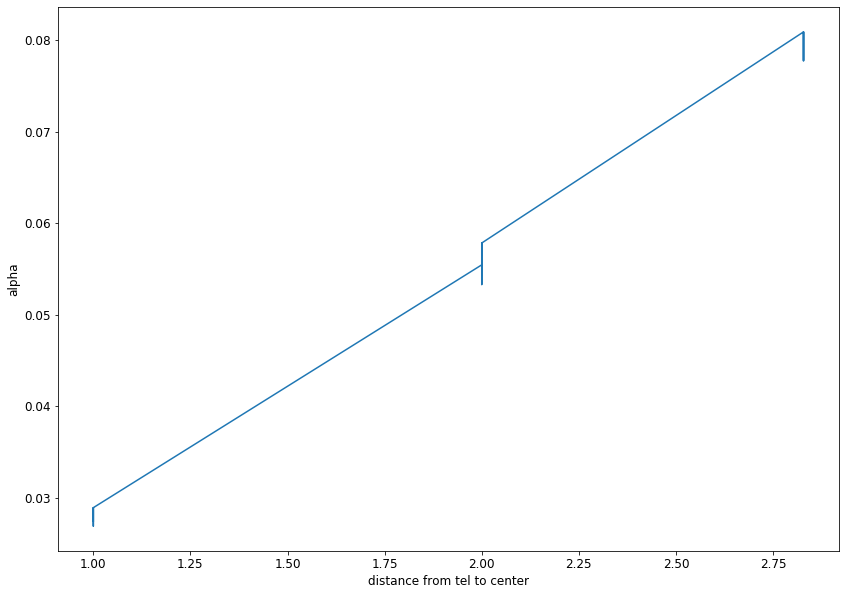

In [561]:
# plt.hist(a)
plt.plot(dist_tels_center, a)
plt.xlabel('distance from tel to center')
plt.ylabel('alpha')

In [630]:
def plot_f(div):
    div = 10**(div)
    
    mean_alt = np.deg2rad(90)
    mean_az = np.pi
    
    test_dict = array_alt_az_div(div, tels, mean_alt, mean_az)
    fig = polar_stuff(plt.figure(figsize=(10,8)), test_dict)
    plt.title("Pointing of MSTs: cfg 4", fontsize=15, y=1.05)
    plt.draw()
    plt.show()
    
    
    dummy_test = test_dict
    # instead of tel_dict_4, you can use tel_dummy
    polygons = {}
    for key, value in dummy_test.items():
        polygons[key-1] = Point(value['PHI'], value['THETA']).buffer(7.7/2)

    xrange = [160, 210]
    yrange = [-10, 10]
    
    rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
    union = unary_union(rings)
    result = {counter:geom for counter, geom in enumerate(polygonize(union))}

    ori = list(polygons.values())
    res = list(result.values())
    
    dict_count_overlaps = {}
    for i in range(len(res)):
        dict_count_overlaps[i] = 0
        for j in range(len(ori)):
            if np.isclose(res[i].difference(ori[j]).area, 0):
                dict_count_overlaps[i] +=1
                #print(f"res_{colors[i]}, orig_{j+1}")
    
    
    max_multiplicity = max(dict_count_overlaps.values())

    cmap = plt.cm.get_cmap('rainbow')
    color_list = cmap(np.linspace(0, 1, max_multiplicity))
    bounds = np.arange(max_multiplicity + 1) + 1
    
    fig = plt.figure()
    gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

    ax = plt.subplot(gs[0])
    ax_cb = plt.subplot(gs[1])

    fig.subplots_adjust(top=0.85)

    for pol_id, pol in result.items():
        colore = dict_count_overlaps[pol_id]
        ax.add_patch(
            PolygonPatch(mapping(pol), color=color_list[colore-1])
        )

    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    cb1 = mpl.colorbar.ColorbarBase(ax_cb, 
                                    norm=norm, 
                                    cmap=cmap, 
                                    boundaries = bounds,
                                    orientation='vertical')
    cb1.set_ticks(np.arange(max_multiplicity + 1) + 0.5) 
    cb1.set_ticklabels(np.arange(max_multiplicity + 1) + 1)

    ax.set_xlim(*xrange)
    ax.set_ylim(*yrange)
    ax.set_aspect(1)
    plt.show()
    
    hfov = []
    for patchsky in res:
        hfov.append(patchsky.area)

    hfov = np.array(hfov)
    # multiplicity associated with each patch
    overlaps = np.array(list(dict_count_overlaps.values()))
    average_overlap = np.average(overlaps, weights=hfov)
    variance = np.average((overlaps-average_overlap)**2, weights=hfov)
    print(average_overlap, variance, np.sqrt(variance))
    
    plt.figure()
    plt.bar(list(set(overlaps)), [hfov[overlaps==i].sum() for i in set(overlaps)])
    plt.ylabel('HFOV')
    plt.xlabel('multiplicity')
    plt.show()
    
    return hfov, overlaps

In [634]:
interactive(plot_f, div=FloatSlider(min=-50, max=-4, step=1, continuous_update=True))

interactive(children=(FloatSlider(value=-4.0, description='div', max=-4.0, min=-50.0, step=1.0), Output()), _d…

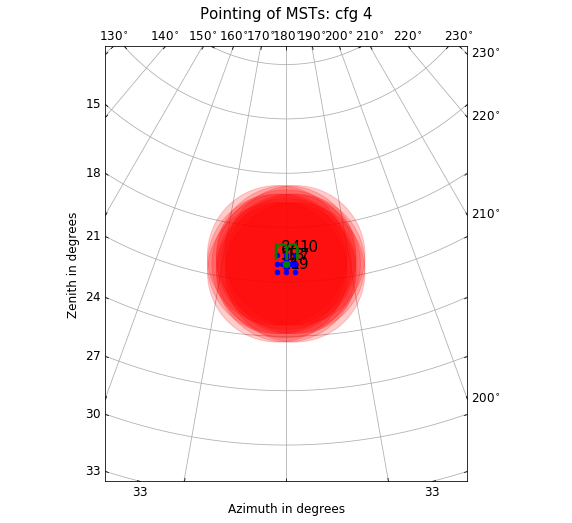

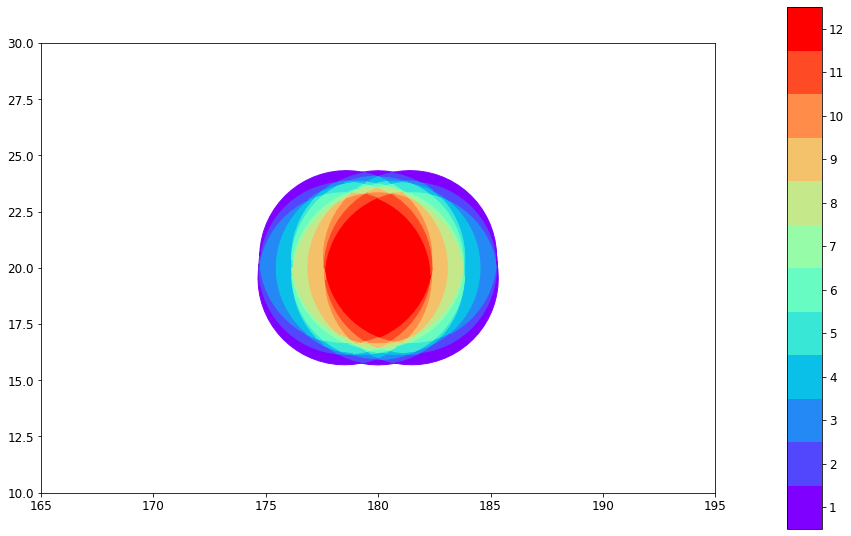

7.089870292171482 16.077986272518107 4.0097364342956645


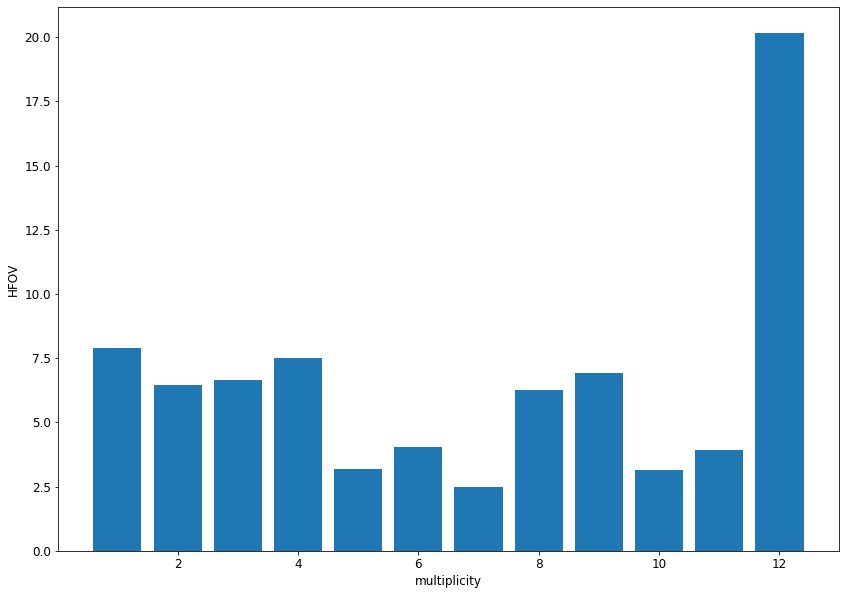

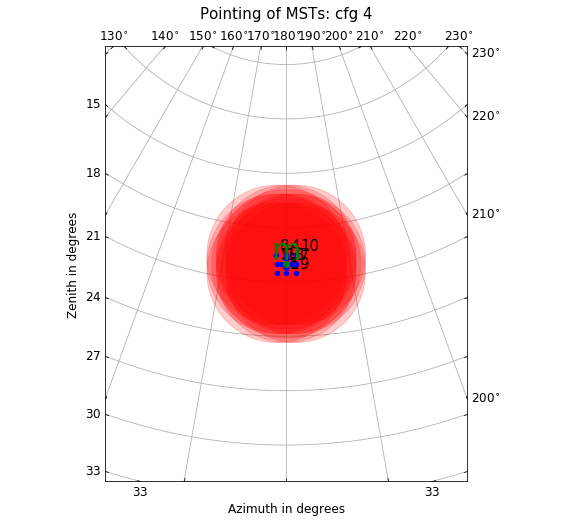

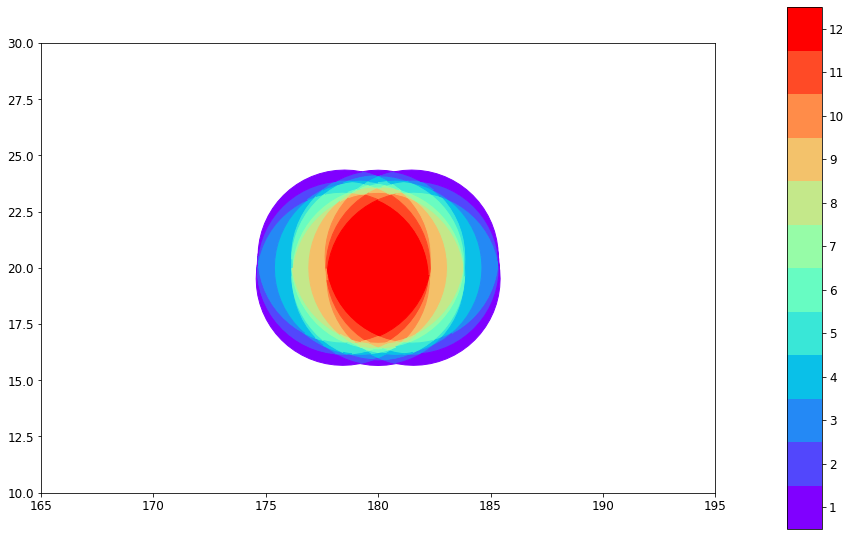

6.928449624802105 15.891756156172367 3.9864465575462527


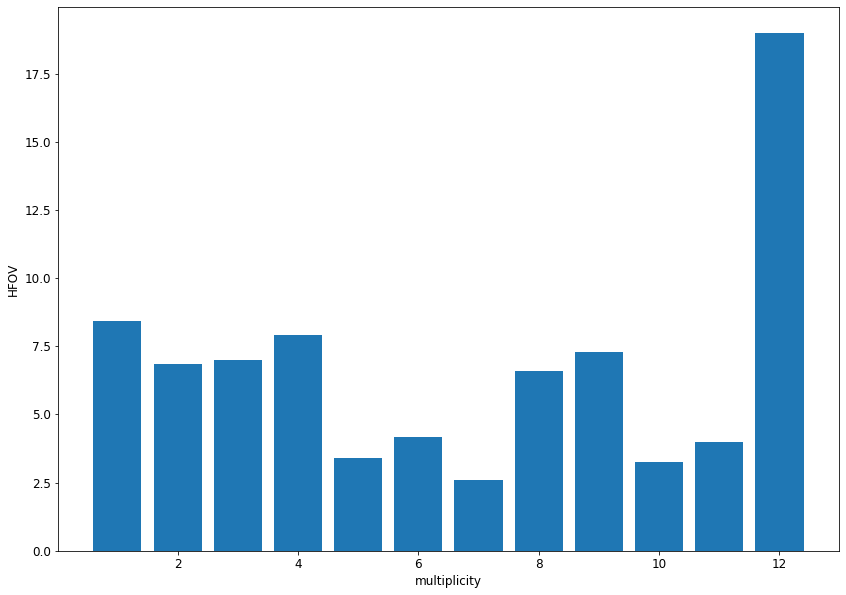

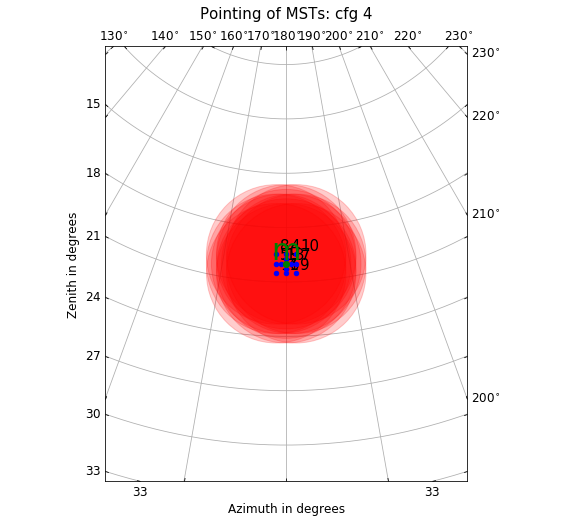

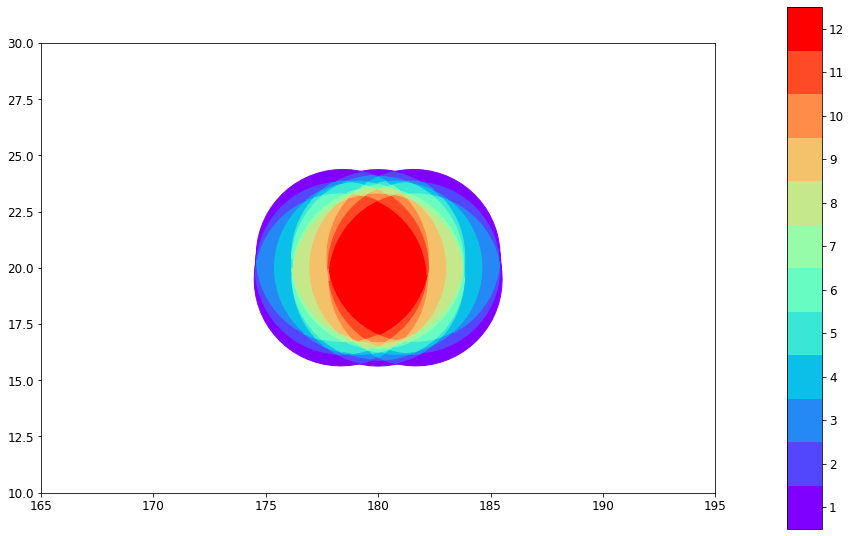

6.756264293290577 15.647831013704561 3.9557339412180594


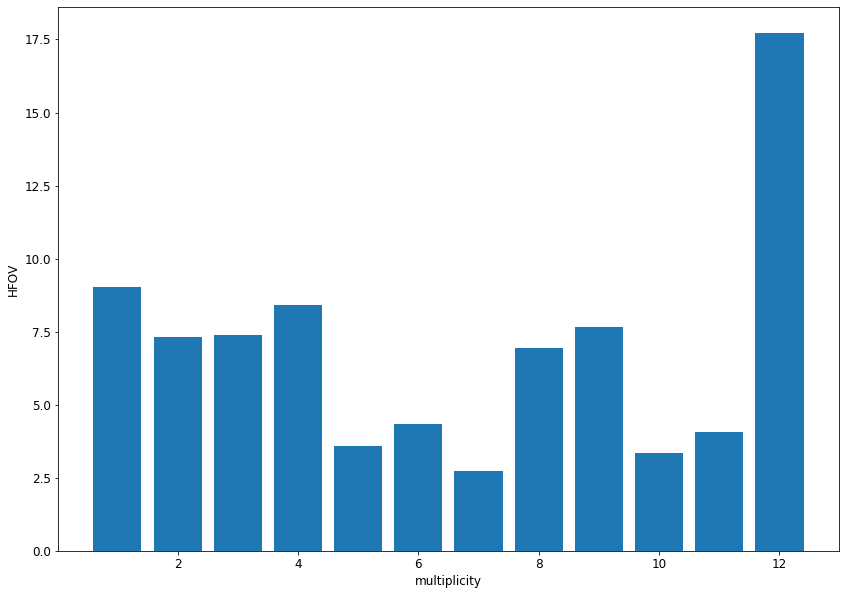

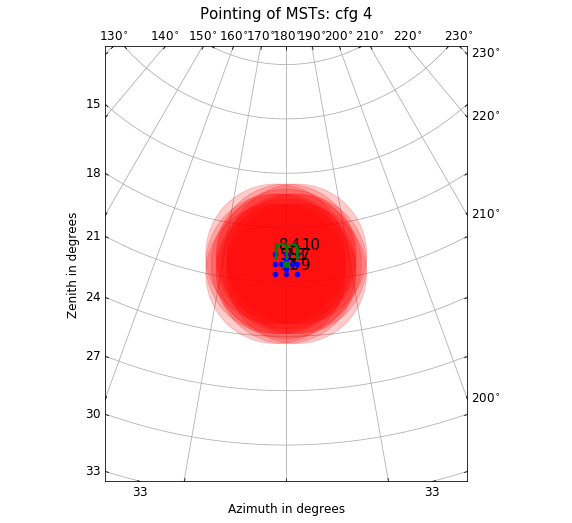

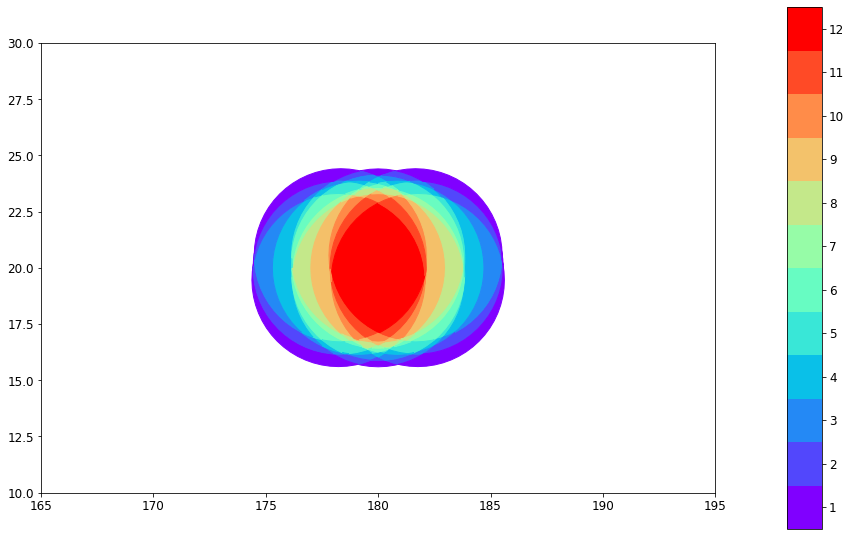

6.572246170586131 15.336422585099024 3.916174483485002


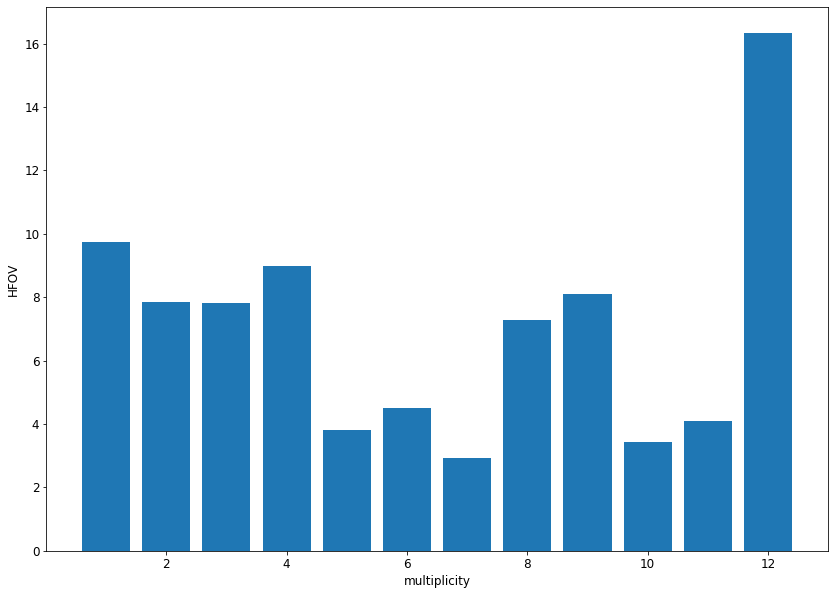

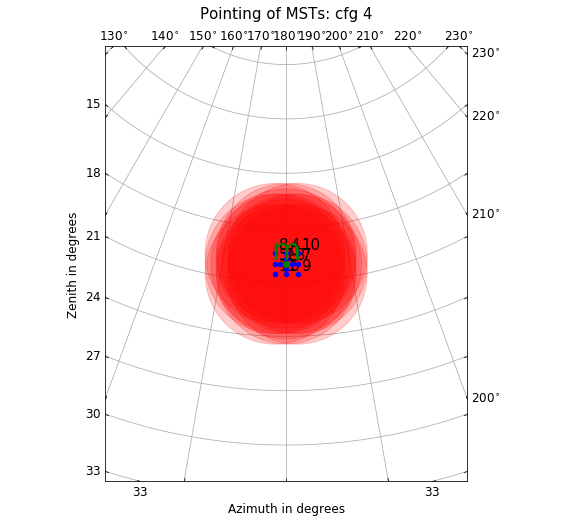

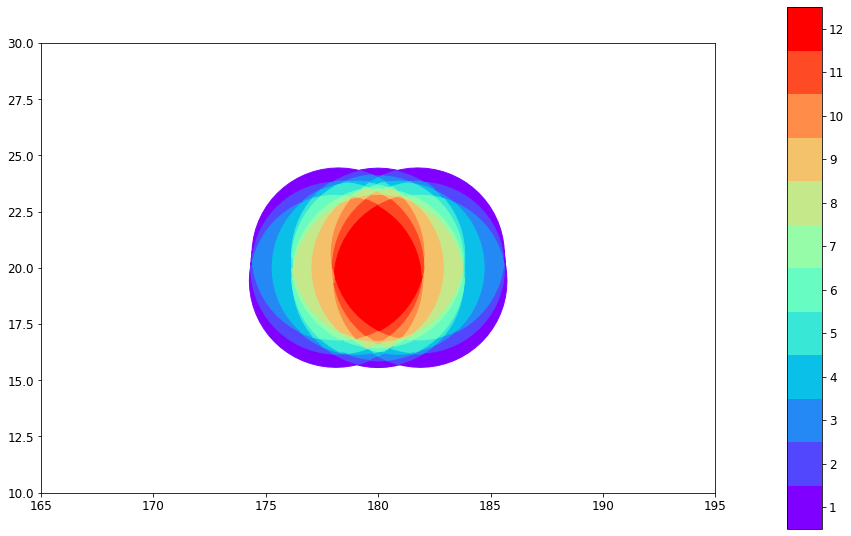

6.375148998624398 14.946242666394097 3.8660370751447917


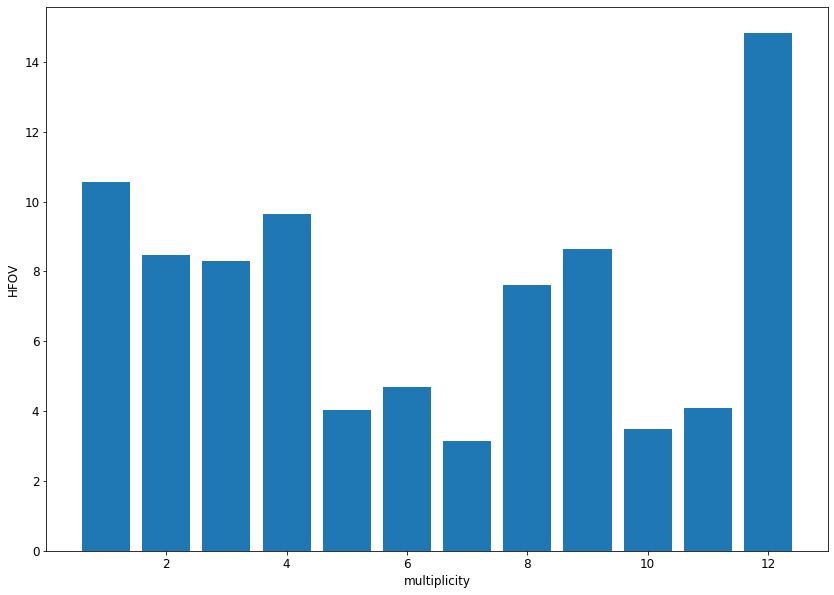

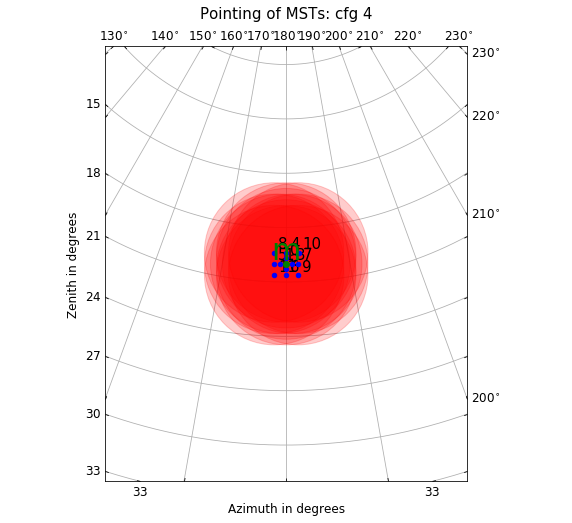

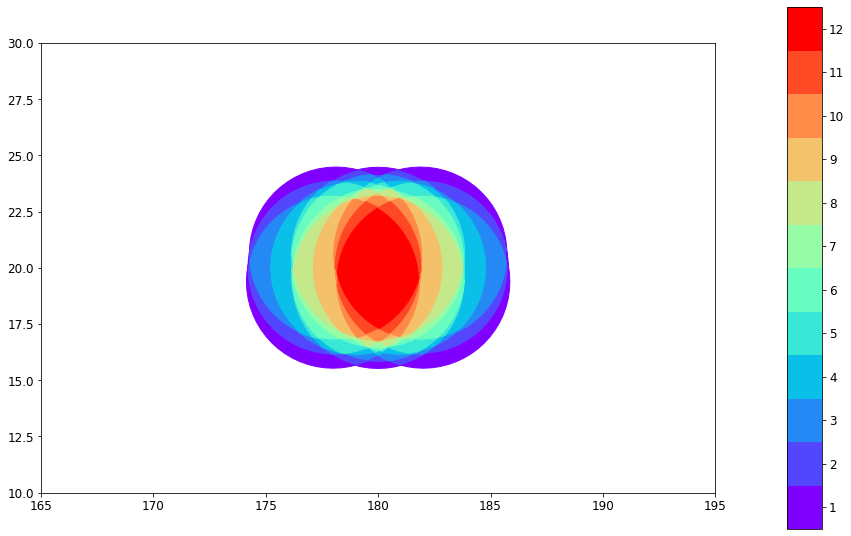

6.163542386561577 14.464242130519317 3.803188416384247


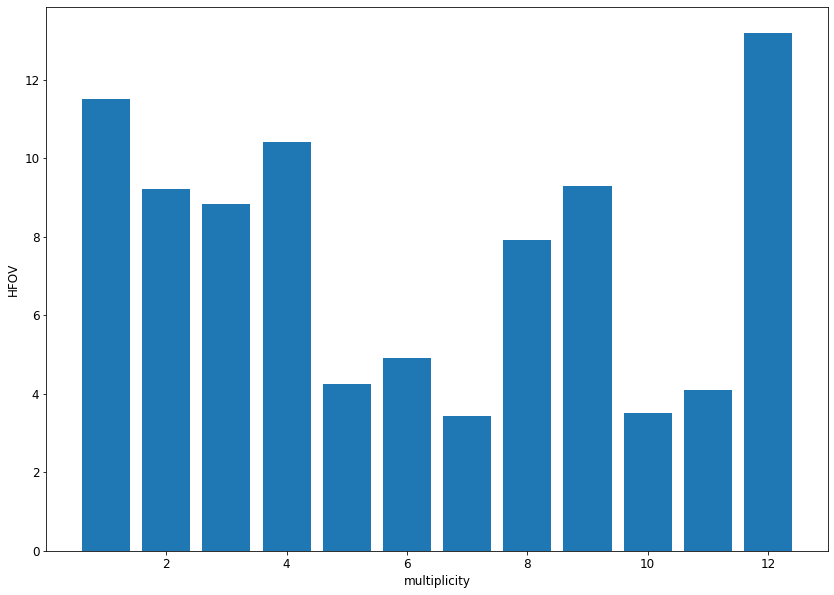

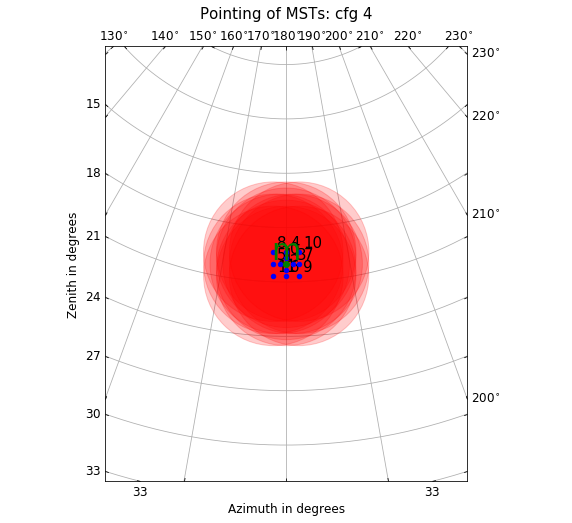

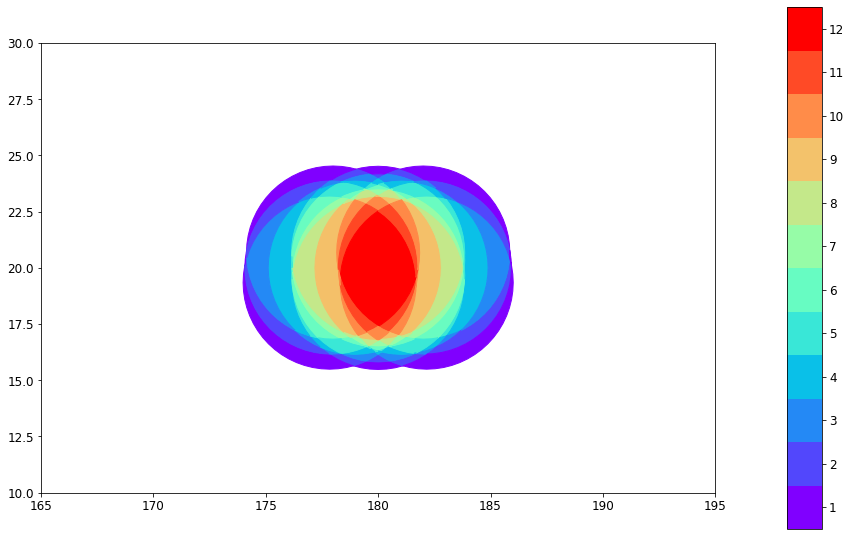

5.935805995738248 13.875658655758308 3.725004517548711


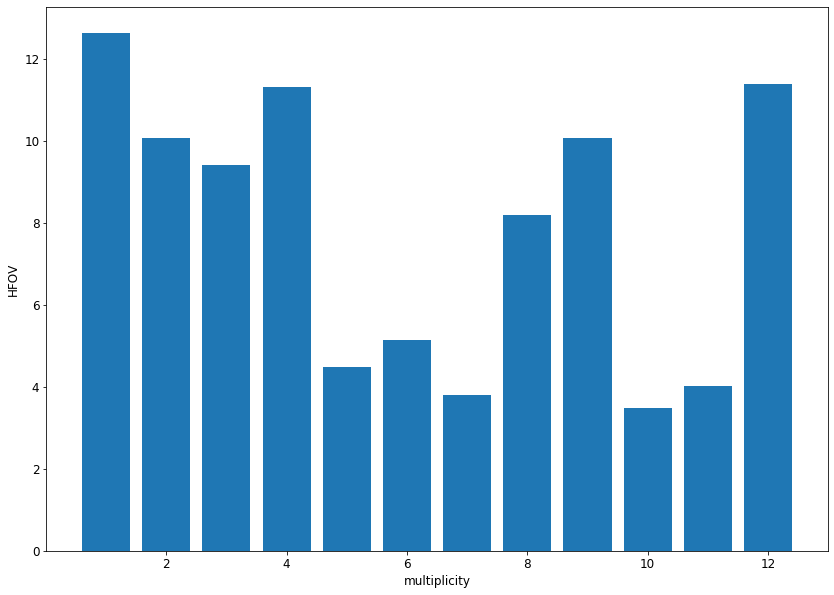

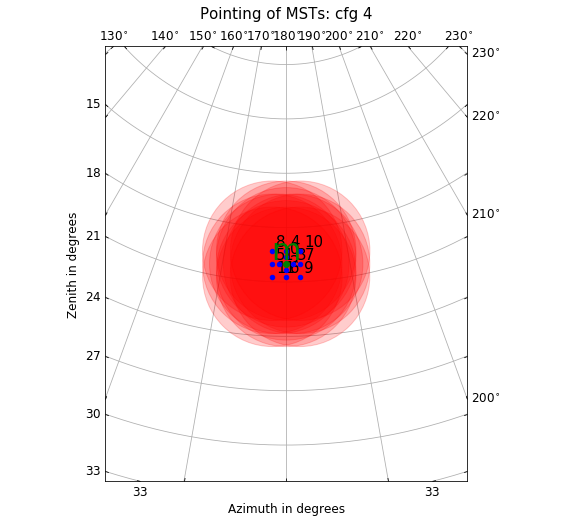

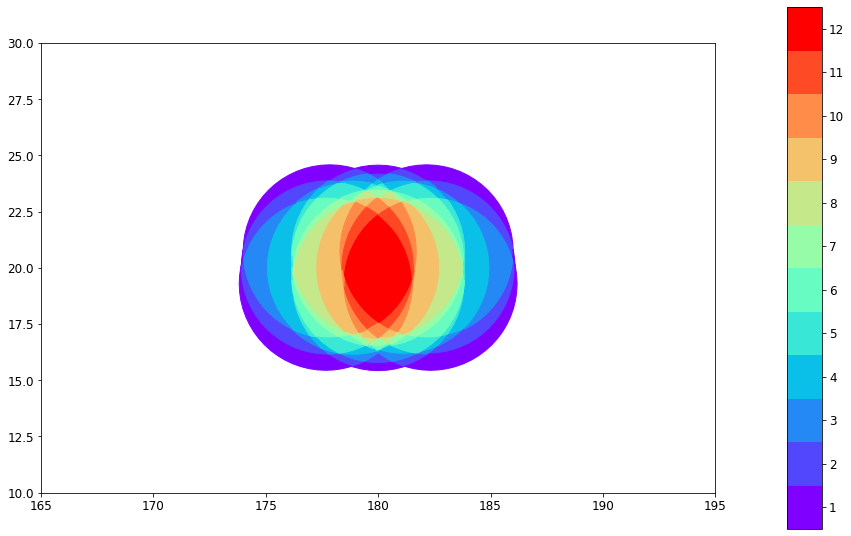

5.690142780209057 13.16372843851168 3.628185281723038


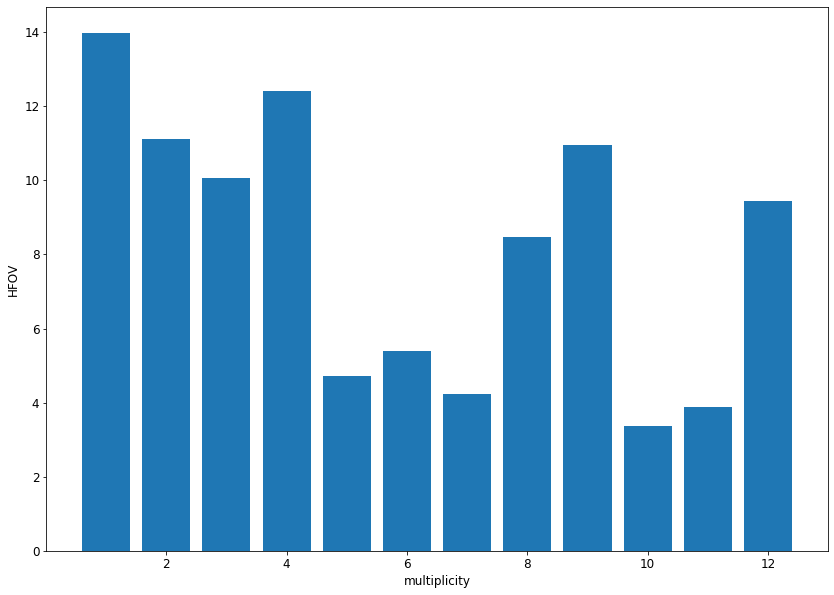

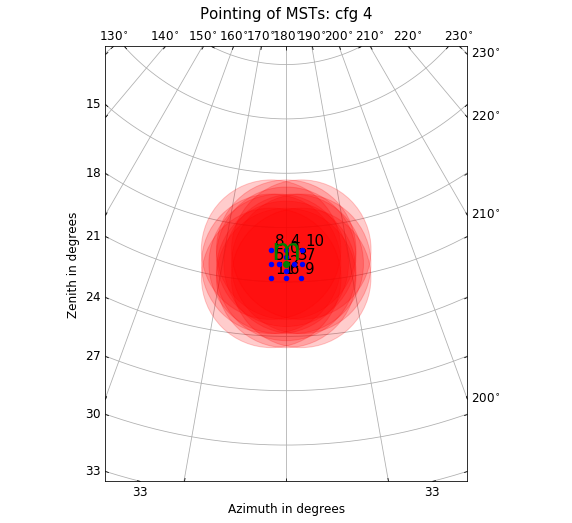

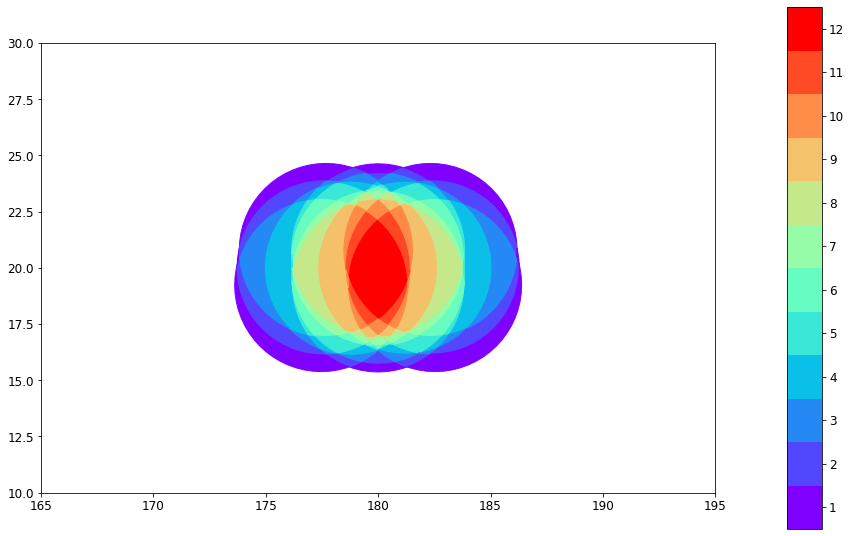

5.424589701470445 12.309951247276928 3.5085540108821083


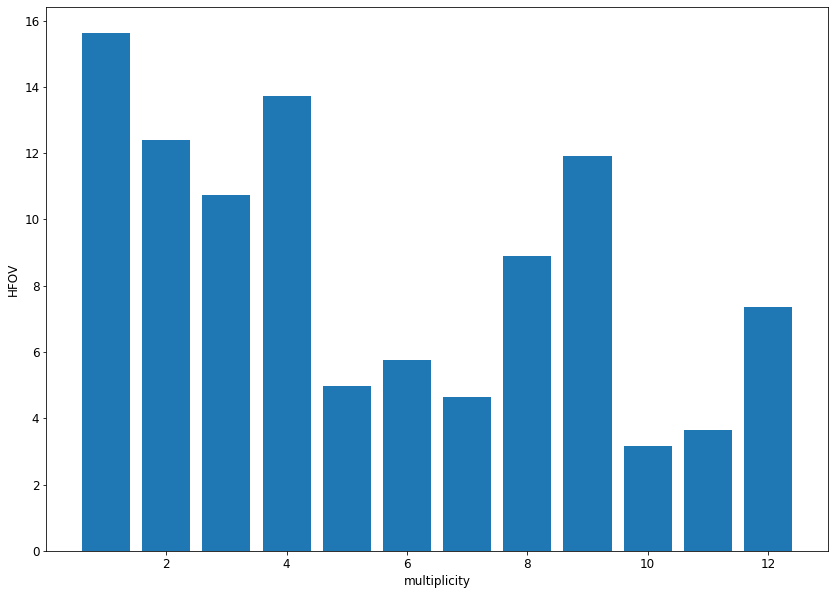

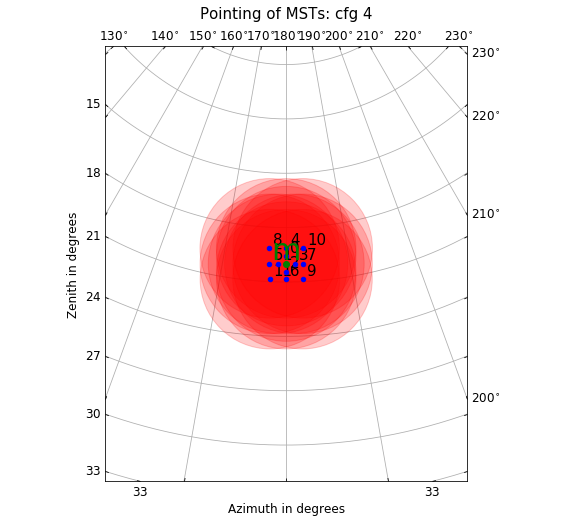

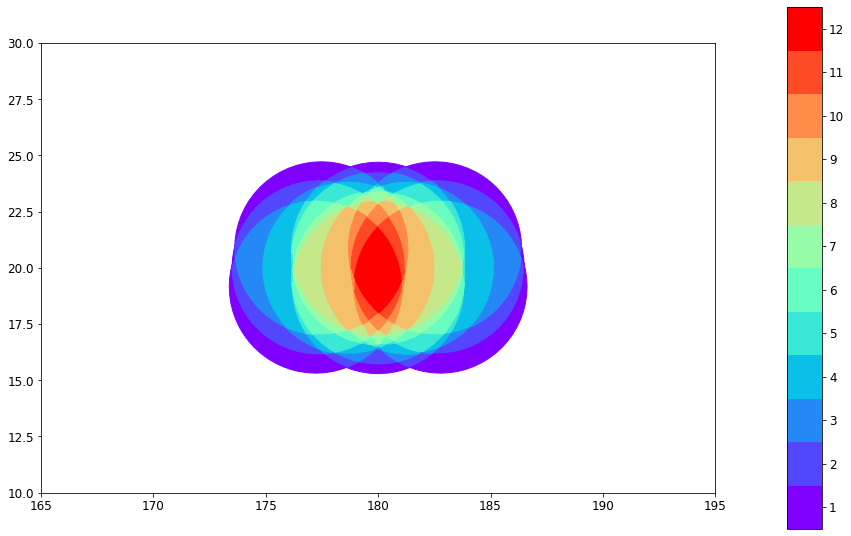

5.136861898213554 11.296490119392445 3.361025158994268


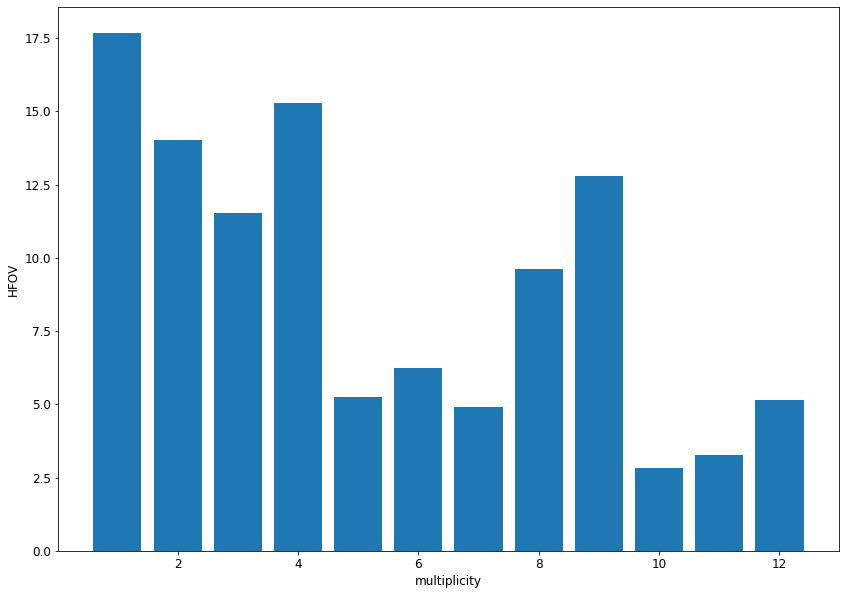

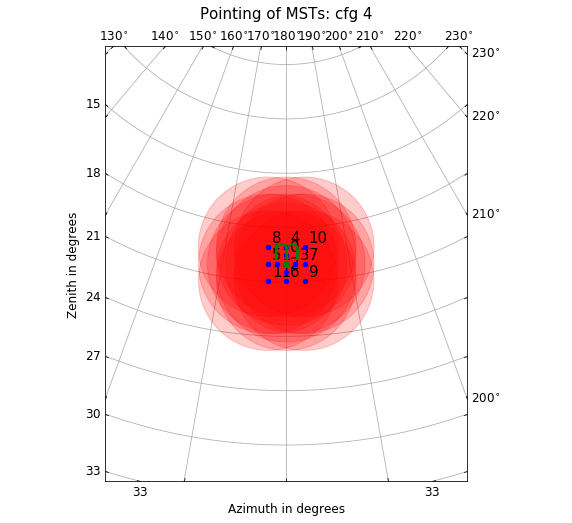

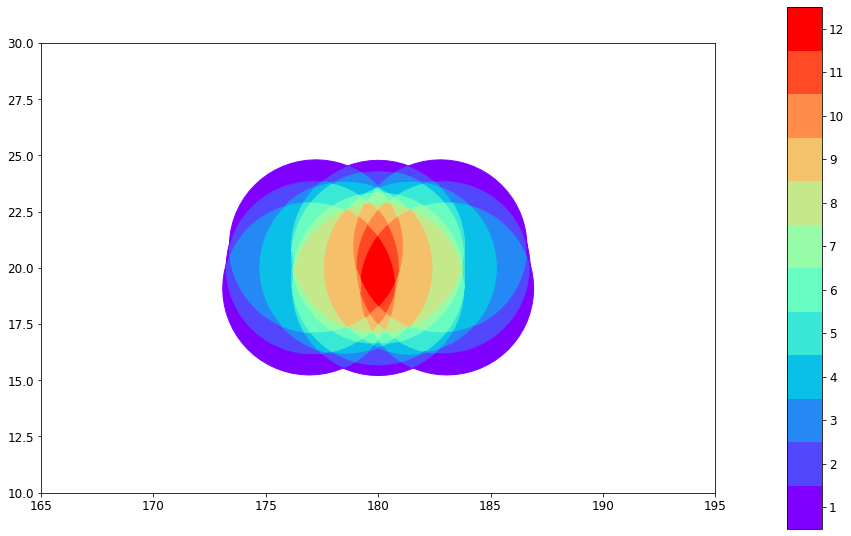

4.824217356236885 10.109764522281205 3.179585589708383


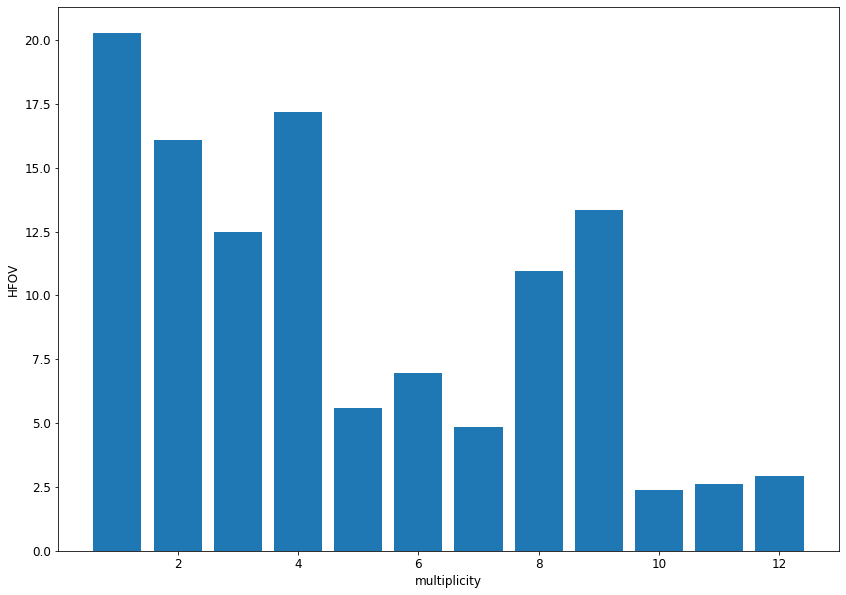

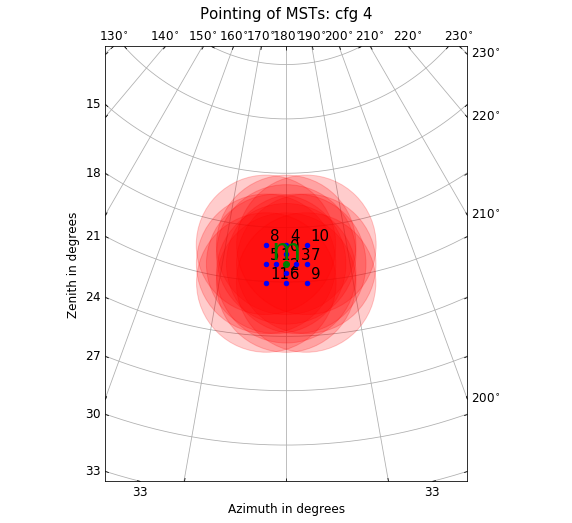

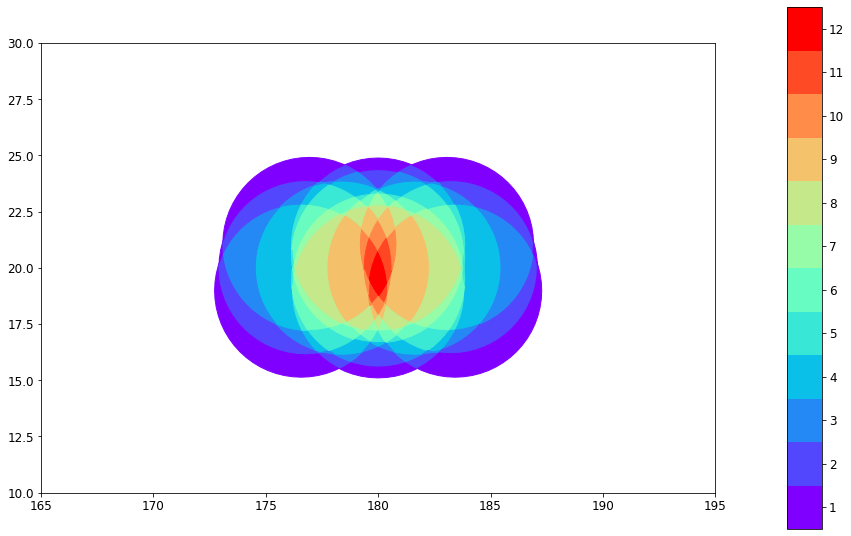

4.48382843572207 8.750370288409782 2.9581024810526397


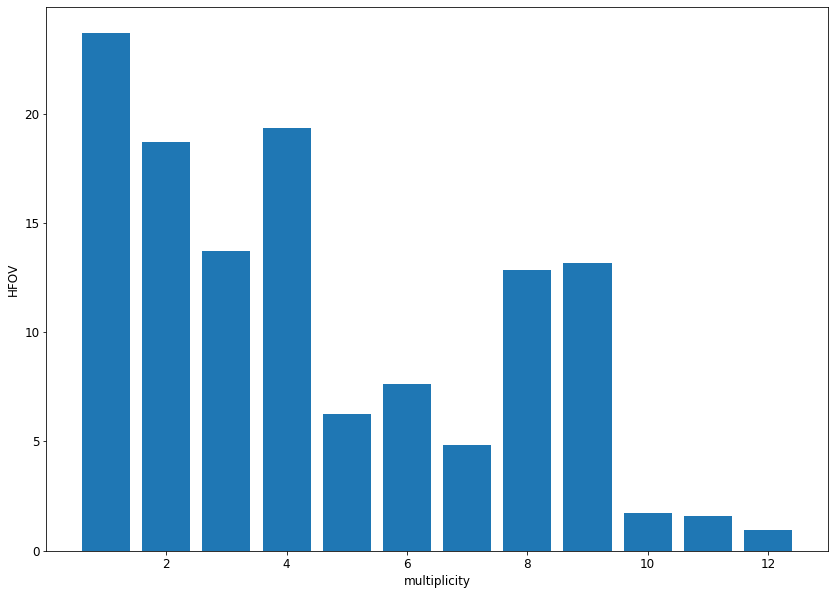

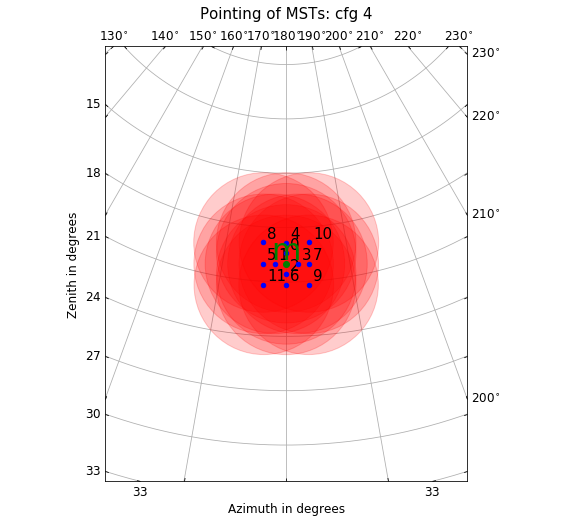

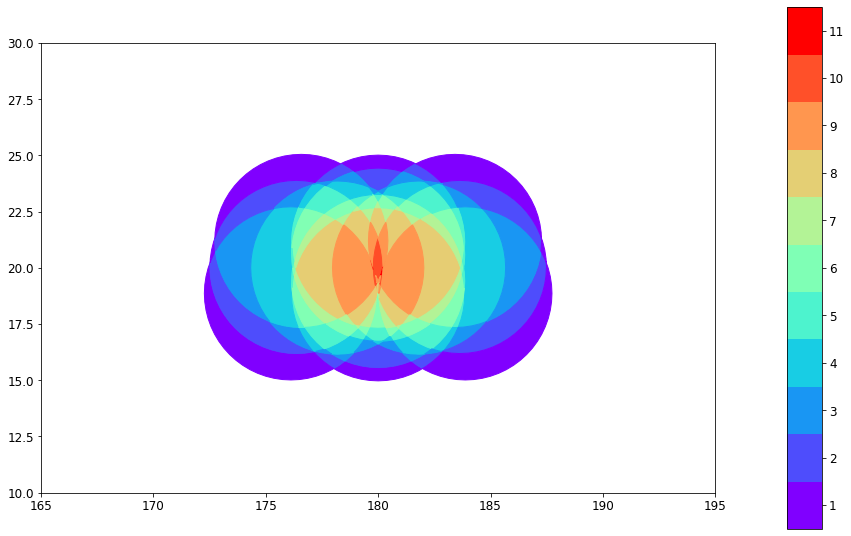

4.11270176101442 7.27726103642398 2.6976399011773196


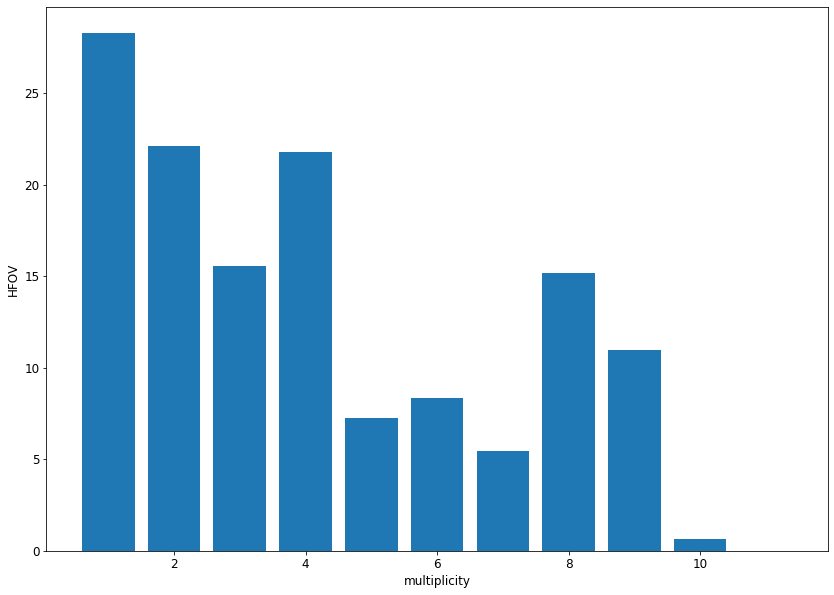

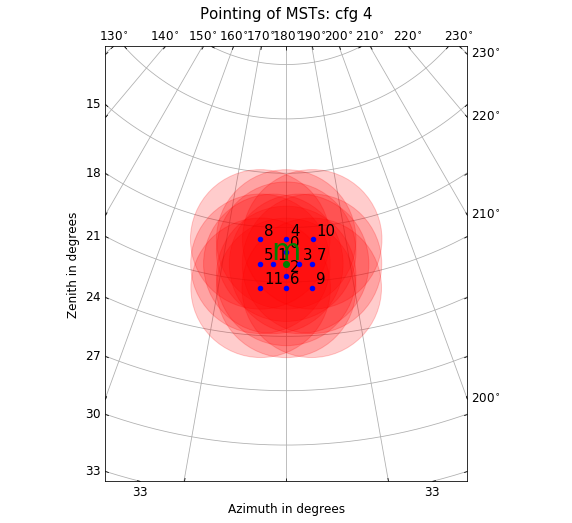

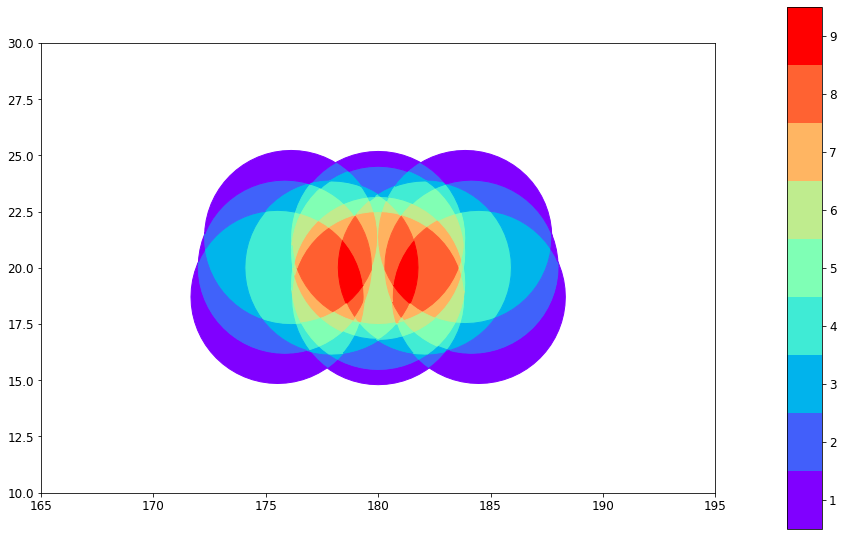

3.7077546840658977 5.846486376715364 2.4179508631722366


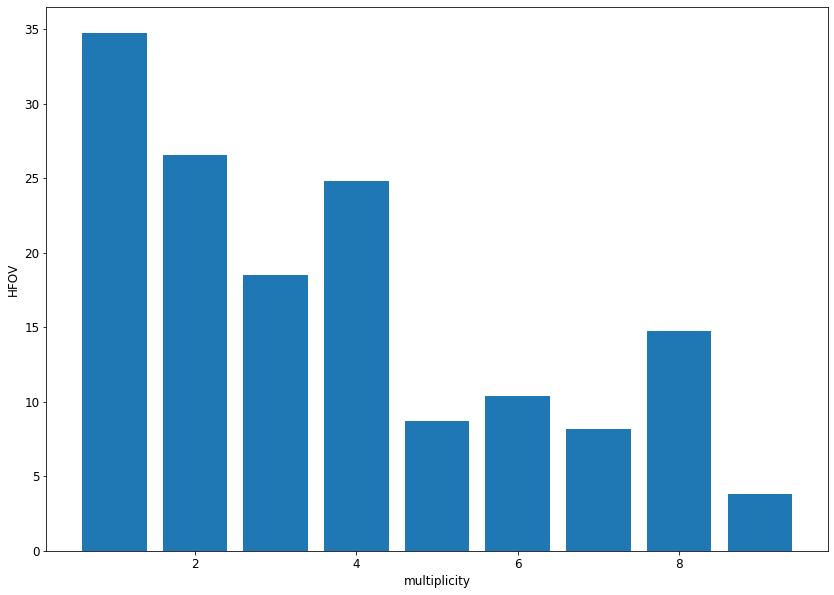

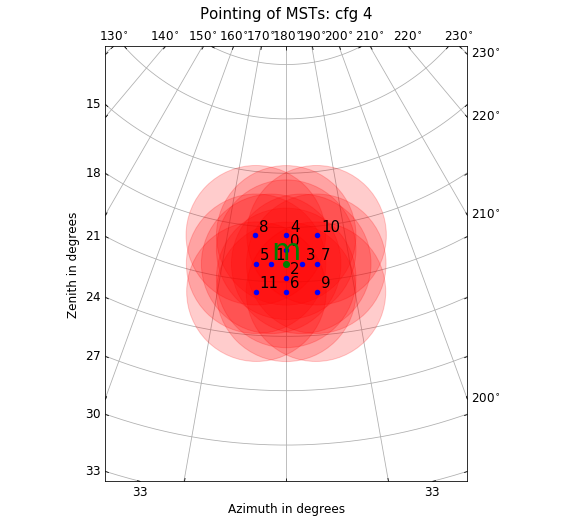

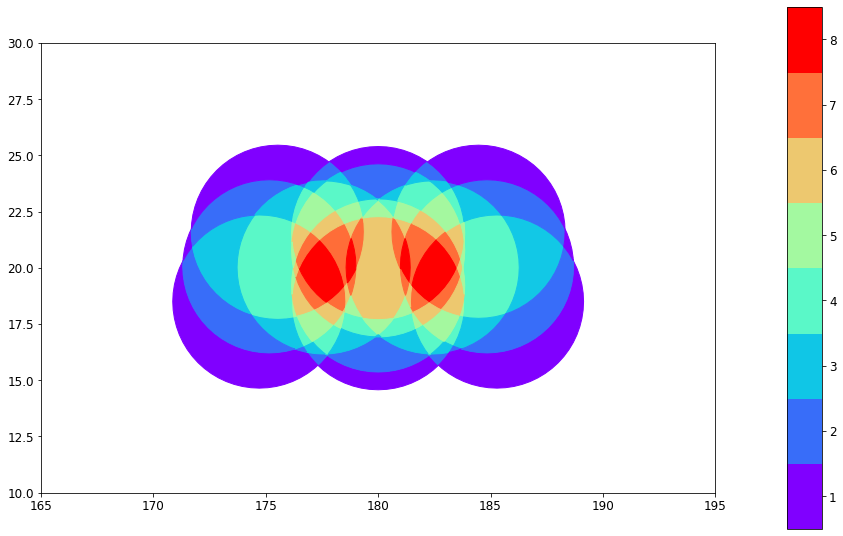

3.266911417452152 4.300741819804581 2.073822996257053


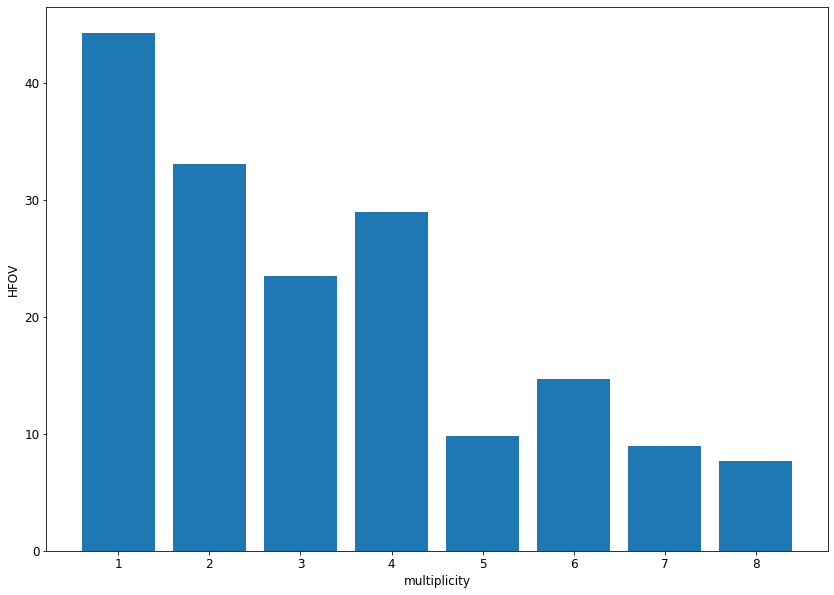

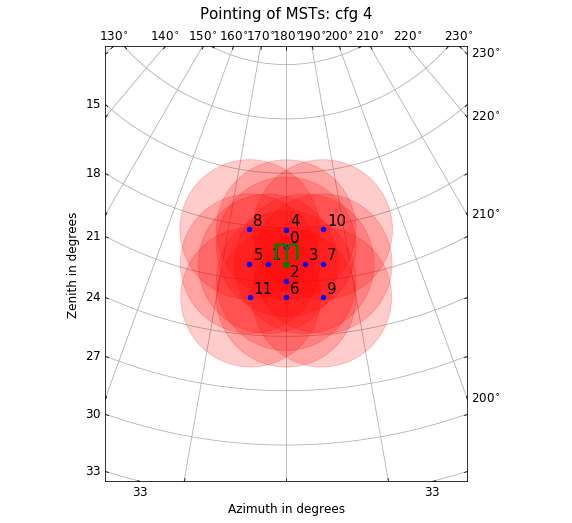

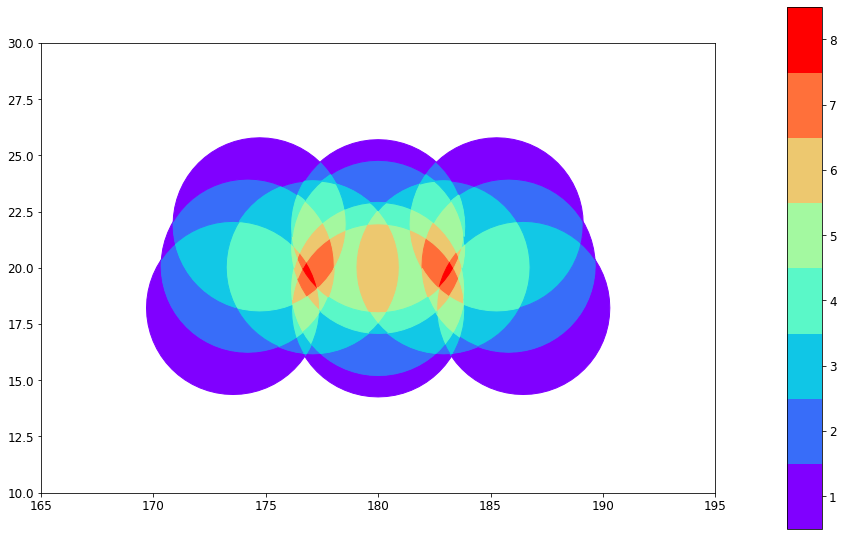

2.791475513015967 2.760378259079675 1.6614386112883242


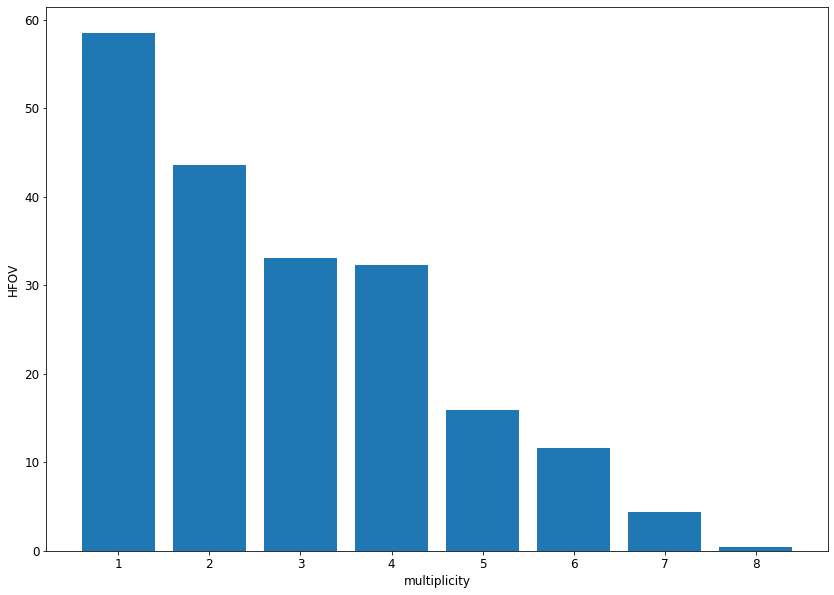

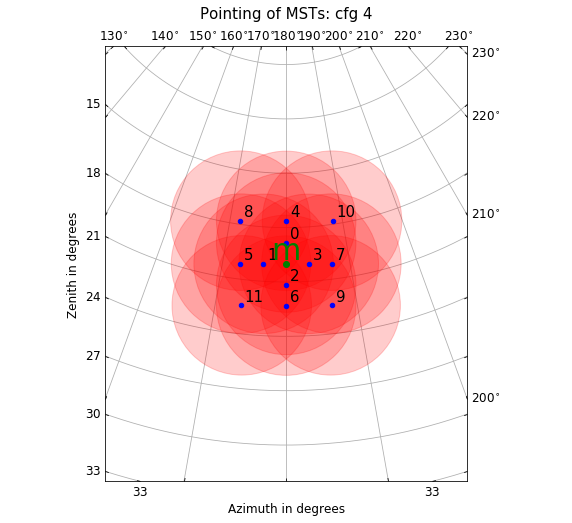

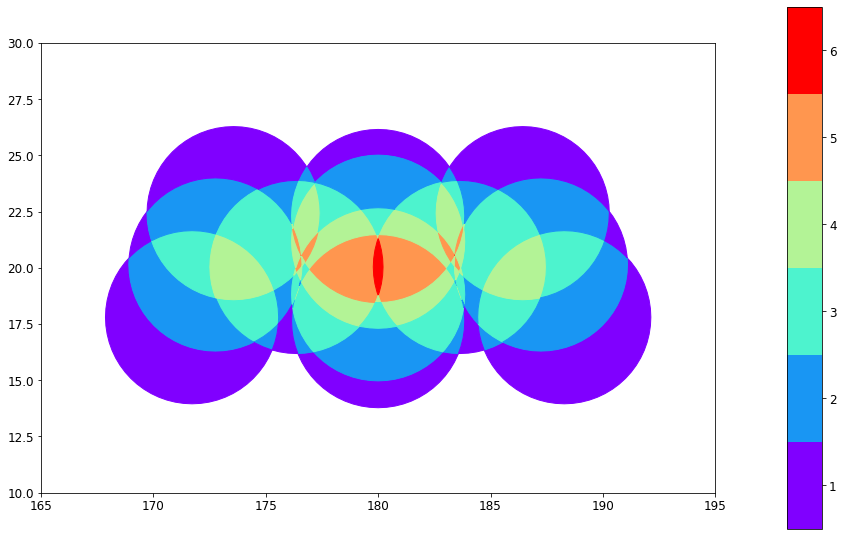

2.2862456078030653 1.4874908063950782 1.2196273227486658


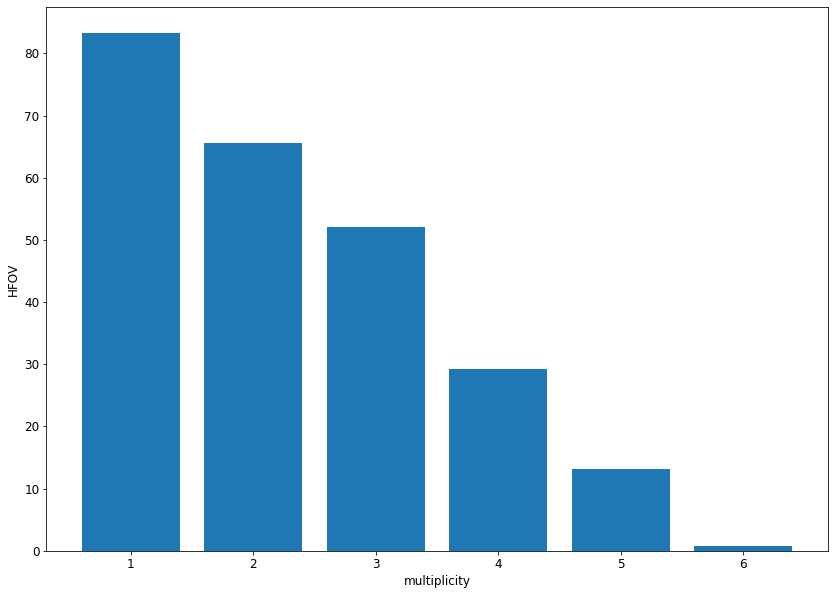

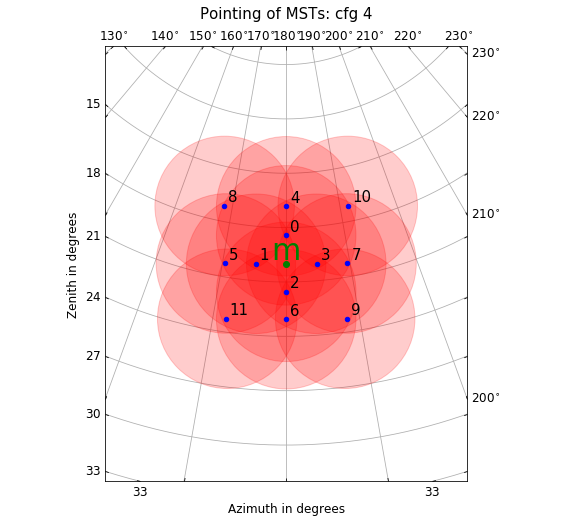

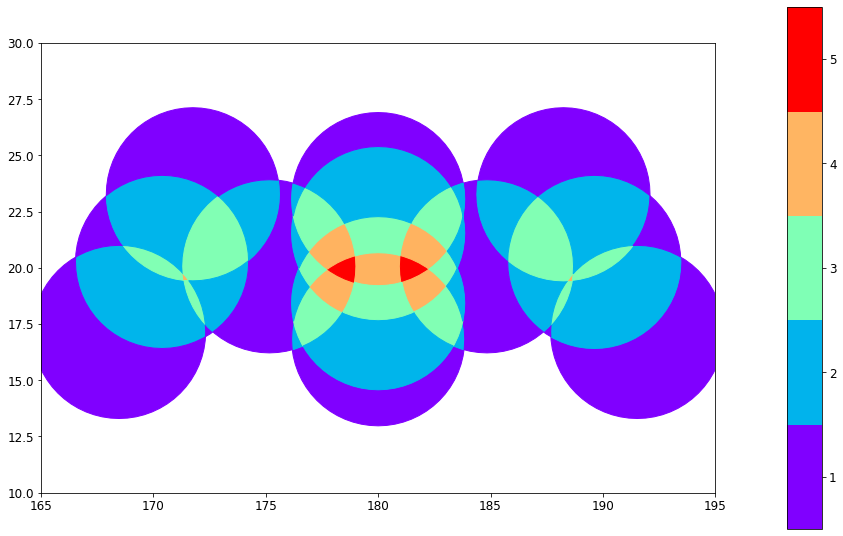

1.7592306553514359 0.7408784589891566 0.8607429691778822


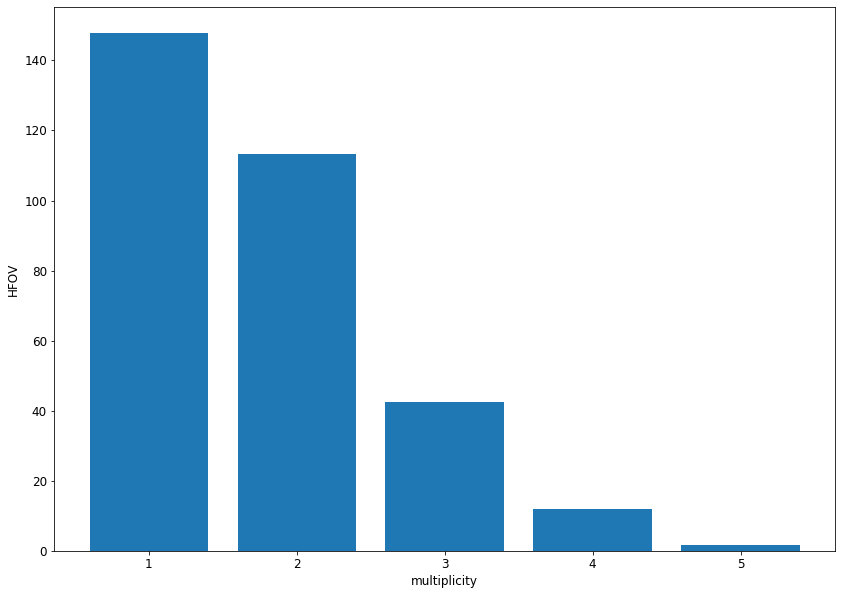

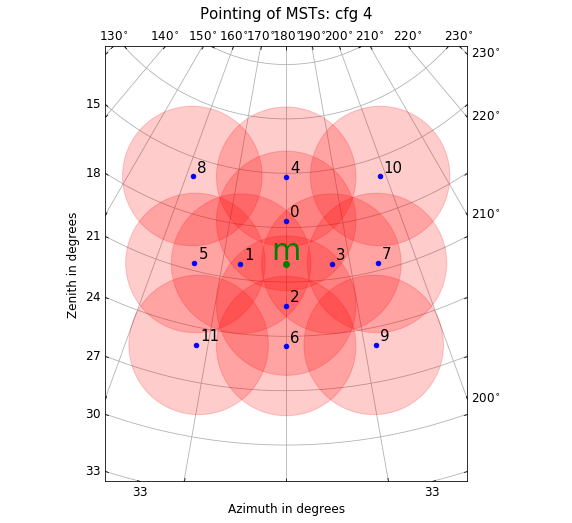

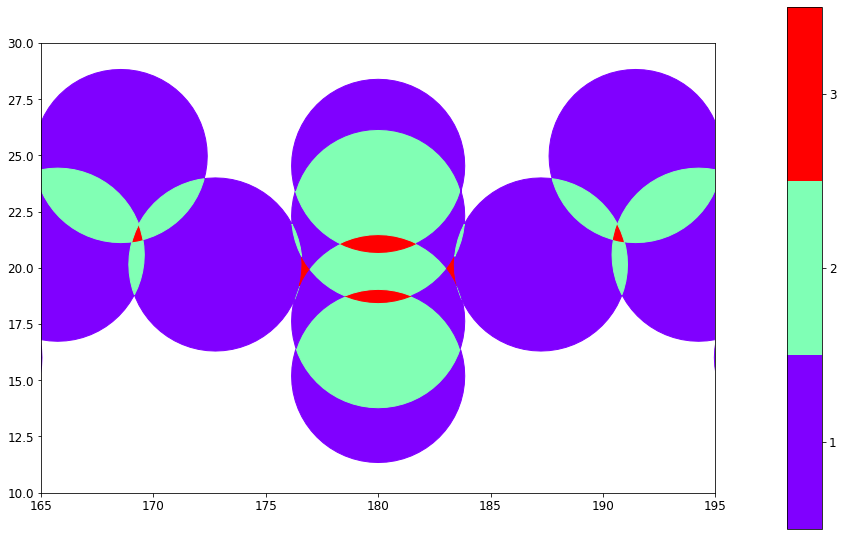

1.2370611681558648 0.19737469400223387 0.4442687182350721


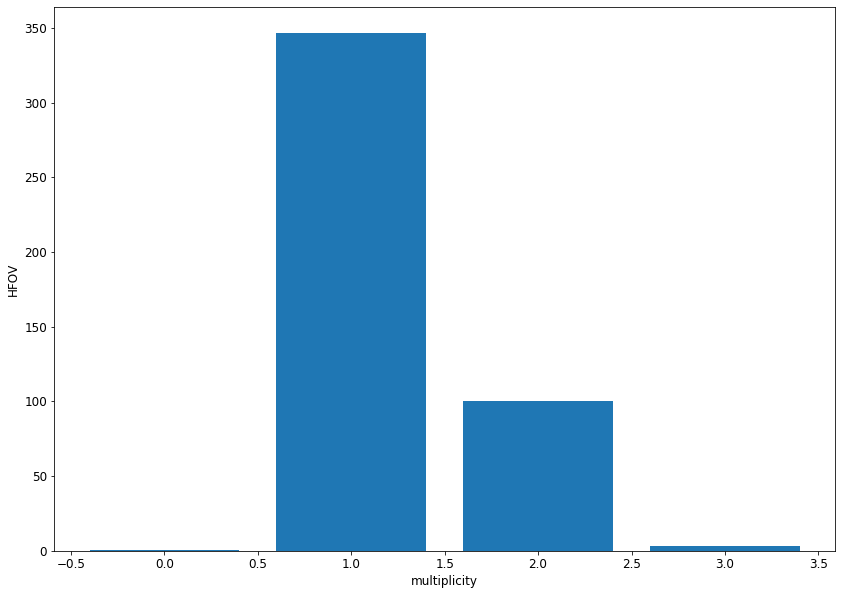

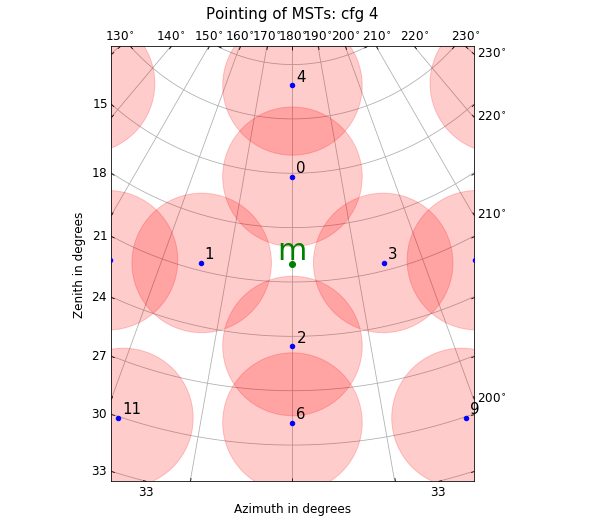

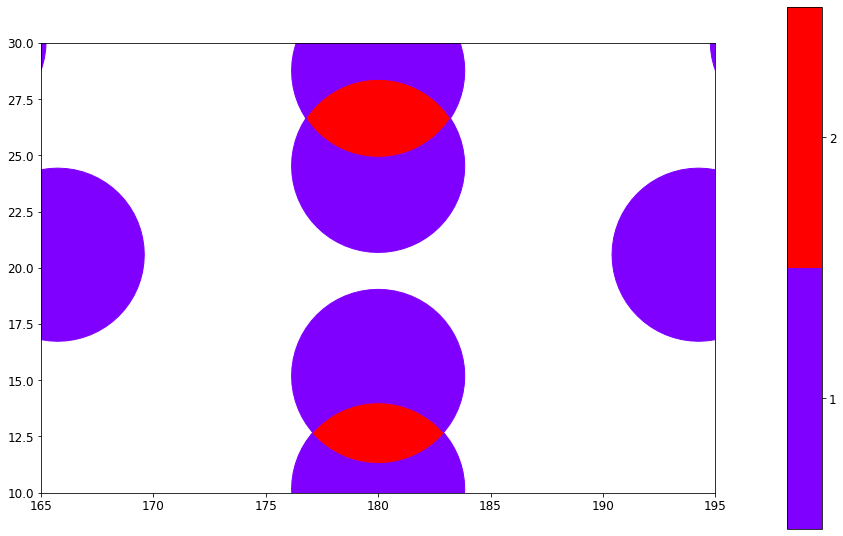

1.0496762309640566 0.047208503041262145 0.2172751781526416


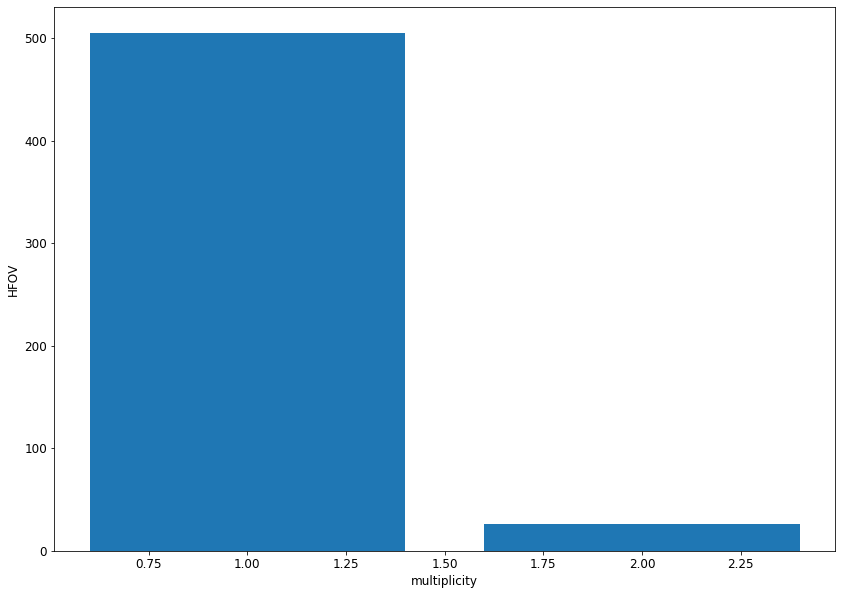

In [494]:
HFOV = {}
multi = {}
DIV = np.arange(-100, -3, step=5, dtype=float) #[-50, -40, -30, -20, -10, -5]
for div in DIV:
    hfov, mult = plot_f(div)
    HFOV[div] = hfov
    multi[div] = mult

In [498]:
multi[-50]

array([ 1,  2,  2,  2,  2,  1,  2,  2,  5,  4,  4,  3,  3,  2,  1,  1,  3,
        2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  7,  6,  8,  7,  9,  8,
        8,  7,  9,  8,  8,  7,  7,  6,  8,  7,  7,  6,  6,  5, 11, 10, 10,
        9,  9,  8,  8,  7,  7,  6,  6,  5,  5,  4,  4,  3,  3,  1,  3,  2,
        3,  5,  4,  6,  5,  9, 10, 11, 10, 12, 11,  3,  4,  3,  5,  7,  9,
        8, 10, 11, 10, 10,  6,  5,  5,  4,  3,  3,  2,  1,  5,  3,  3,  5,
        5,  5,  4,  6,  5,  6,  6,  5,  5,  4,  5,  7,  7,  6,  5,  3,  3,
        3,  5,  4,  5,  5,  7,  6,  7,  3,  3,  3, 10,  1,  1])

In [517]:
multi[-100].min()

1

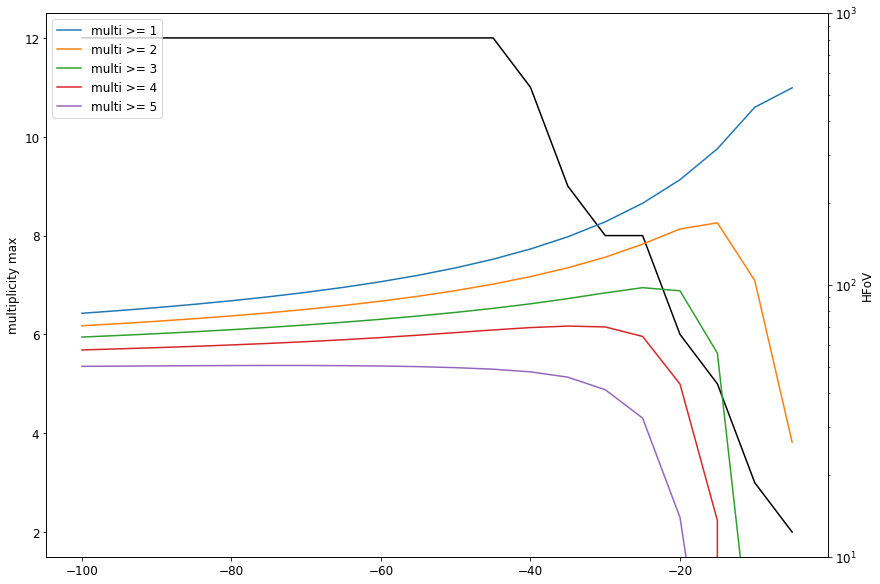

In [536]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(DIV, [multi[d].max() for d in DIV], color='black')
ax.set_ylabel('multiplicity max')
ax2.set_ylabel('HFoV')
# for i in range(1, len(test_dict)+1):
for i in range(1,6):
    ax2.plot(DIV, [HFOV[d][multi[d]>=i].sum() for d in DIV], label=f'multi >= {i}')
ax2.set_yscale('log')
ax2.set_ylim(10,1000)
plt.legend()

# shapely

In [427]:
# If you use the dummy, you can clearly see the superposition

dummy_test = {}
dummy_test[1] = {'THETA': 20, 'PHI': 180}
dummy_test[2] = {'THETA': 20, 'PHI': 184.1}
dummy_test[3] = {'THETA': 20, 'PHI': 177.9}


In [428]:
# test_dict.pop(4)
# test_dict

In [429]:
dummy_test = test_dict

In [430]:
# instead of tel_dict_4, you can use tel_dummy
polygons = {}
for key, value in dummy_test.items():
    polygons[key-1] = Point(value['PHI'], value['THETA']).buffer(7.7/2)

xrange = [165, 195]
yrange = [10, 30]

In [431]:
rings = [LineString(list(pol.exterior.coords)) for pol in polygons.values()]
union = unary_union(rings)
result = {counter:geom for counter, geom in enumerate(polygonize(union))}

ori = list(polygons.values())
res = list(result.values())

In [432]:
dict_count_overlaps = {}
for i in range(len(res)):
    dict_count_overlaps[i] = 0
    for j in range(len(ori)):
        if np.isclose(res[i].difference(ori[j]).area, 0):
            dict_count_overlaps[i] +=1
            #print(f"res_{colors[i]}, orig_{j+1}")

In [433]:
max_multiplicity = max(dict_count_overlaps.values())

cmap = plt.cm.get_cmap('rainbow')
color_list = cmap(np.linspace(0, 1, max_multiplicity))
bounds = np.arange(max_multiplicity + 1) + 1

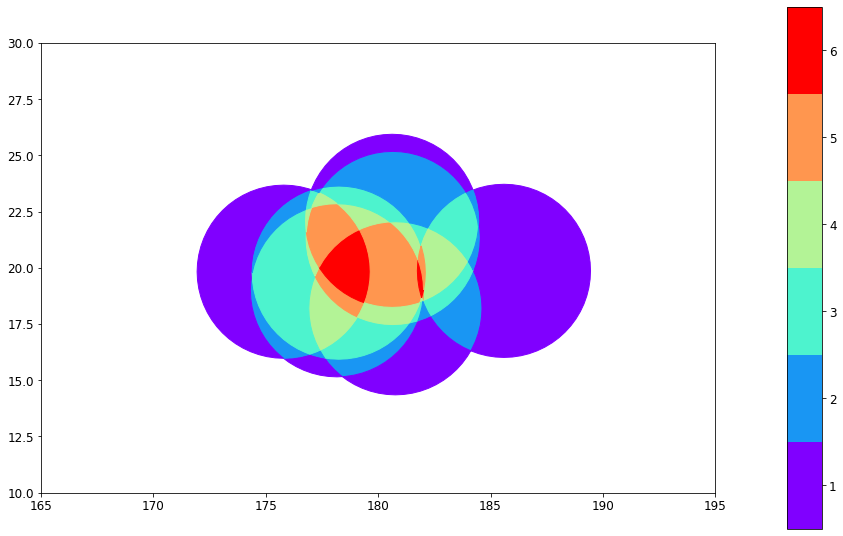

In [434]:
fig = plt.figure()
gs  = mpl.gridspec.GridSpec(1, 2, width_ratios=[0.95, 0.05])

ax = plt.subplot(gs[0])
ax_cb = plt.subplot(gs[1])

fig.subplots_adjust(top=0.85)

for pol_id, pol in result.items():
    colore = dict_count_overlaps[pol_id]
    ax.add_patch(
        PolygonPatch(mapping(pol), color=color_list[colore-1])
    )

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb1 = mpl.colorbar.ColorbarBase(ax_cb, 
                                norm=norm, 
                                cmap=cmap, 
                                boundaries = bounds,
                                orientation='vertical')
cb1.set_ticks(np.arange(max_multiplicity + 1) + 0.5) 
cb1.set_ticklabels(np.arange(max_multiplicity + 1) + 1)

ax.set_xlim(*xrange)
ax.set_ylim(*yrange)
ax.set_aspect(1)
plt.show()

**ori** are the original circles, whereas **res** are the single patches into which we have divided the circles. Each patch have a **.area** attribute


In [404]:
hfov = []
for patchsky in res:
    hfov.append(patchsky.area)
    
hfov = np.array(hfov)

In [405]:
# multiplicity associated with each patch
overlaps = np.array(list(dict_count_overlaps.values()))

In [406]:
average_overlap = np.average(overlaps, weights=hfov)
variance = np.average((overlaps-average_overlap)**2, weights=hfov)
print(average_overlap, variance, np.sqrt(variance))

2.692997022941306 2.0167715954044865 1.4201308374246673


In [407]:
hfov

array([2.37078081e+00, 1.83810243e-01, 2.54747799e+00, 3.11910704e+00,
       5.41758620e+00, 5.32819921e+00, 5.41118228e+00, 2.25343351e-02,
       1.68332210e+00, 6.77947721e+00, 9.36204002e+00, 5.26164544e+00,
       9.44144538e+00, 8.00181452e-01, 1.70224346e+00, 1.74442973e-01,
       2.37132511e+00, 1.05726322e+00, 1.22938669e-01, 9.84282342e+00,
       5.35033296e-01, 2.96865300e+00, 2.32128995e+00, 9.15138795e-01,
       3.13895883e-02, 3.56979089e-01, 2.97403172e+00, 2.55828433e+00,
       2.25766742e+00, 4.66508806e-02, 1.59285879e+00, 2.06711807e+00,
       2.63045736e+00, 1.91170642e-01, 1.51837648e+00, 2.74808909e+00,
       4.65200415e+00, 9.05903060e+00, 8.93708274e-01, 3.83225572e+00,
       4.49271535e-01, 8.66697725e+00, 8.48239501e-01, 7.01434867e-01,
       9.92233139e-03, 1.01278983e+01, 5.74805480e+00, 2.05706066e+01,
       6.26784606e+00, 2.09376218e+00, 4.44811465e-03])

In [445]:
overlaps.max()

6

In [450]:
hfov[overlaps==5]

array([1.05726322, 0.5350333 , 2.968653  , 2.06711807, 4.65200415])

In [460]:
[hfov[overlaps==i].sum() for i in set(overlaps)]

[41.288683562440376,
 44.04751650672514,
 44.64363602343846,
 21.535744058355395,
 11.280071725148245,
 9.84282341763381]

Text(0.5, 0, 'multiplicity')

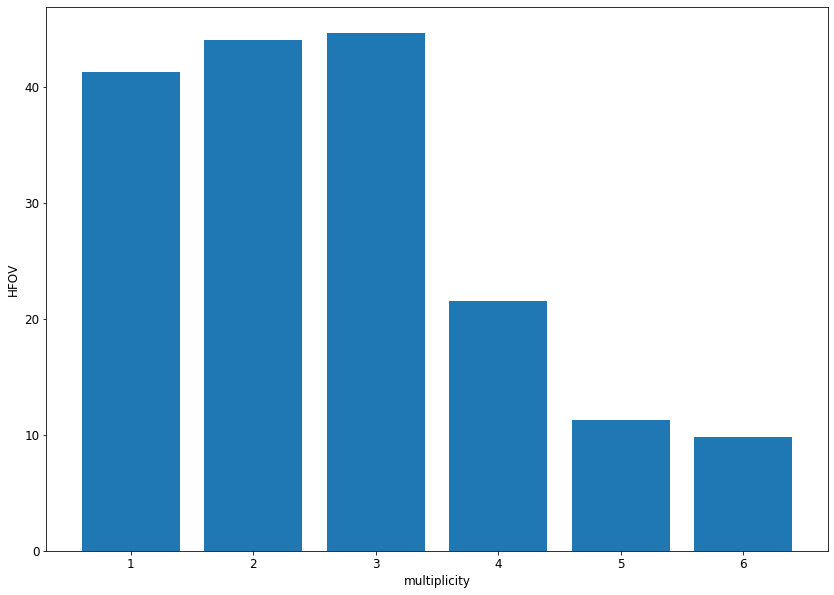